In [2]:
import sys; sys.path.insert(0, '../')
%load_ext autoreload
%autoreload 2

import pyqg_subgrid_experiments as pse
import matplotlib.pyplot as plt
import torch
import xarray as xr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import torch
torch.cuda.is_available()

True

In [ ]:
test_set = "/scratch/zanna/data/pyqg/data/test/*.nc"
train_set = "/scratch/zanna/data/pyqg/data/train/*.nc"
transfer_set = "/scratch/zanna/data/pyqg/data/transfer/*.nc"

In [ ]:
test = pse.Dataset(test_set)
test['psi'] = test.streamfunction

In [126]:
transfer = pse.Dataset(transfer_set)
transfer['psi'] = transfer.streamfunction

In [61]:
train = pse.Dataset(train_set)

In [15]:
m = SimpleCNNModel([('q',0), ('q',1)], [('q',0), ('q',1)])

In [16]:
m.fit(test, test.isel(run=0), num_epochs=10, batch_size=64)
m.fit(test, test.isel(run=0), num_epochs=10, batch_size=64)

Training starts on device cpu, number of samples 2175
Epoch: 1, Loss: 0.6222173988545078, Epoch time: 0.07702183723449707, ETA: 0.693211555480957
Epoch: 2, Loss: 0.34890186481092167, Epoch time: 0.07265996932983398, ETA: 0.5990085601806641
Epoch: 3, Loss: 0.2403303526804365, Epoch time: 0.07463574409484863, ETA: 0.5237224896748861
Epoch: 4, Loss: 0.1777546633523086, Epoch time: 0.07236576080322266, ETA: 0.44532036781311035
Epoch: 5, Loss: 0.13909246450183035, Epoch time: 0.07195830345153809, ETA: 0.36890125274658203
Epoch: 6, Loss: 0.12361934628294802, Epoch time: 0.07860660552978516, ETA: 0.2983806927998861
Epoch: 7, Loss: 0.12131662216679803, Epoch time: 0.07197880744934082, ETA: 0.2226897648402623
Epoch: 8, Loss: 0.1200083511382684, Epoch time: 0.07254910469055176, ETA: 0.14805585145950317
Epoch: 9, Loss: 0.11987113442914239, Epoch time: 0.07314491271972656, ETA: 0.07393664783901642
Epoch: 10, Loss: 0.11984540715299803, Epoch time: 0.07159161567687988, ETA: 0.0
Training starts on de

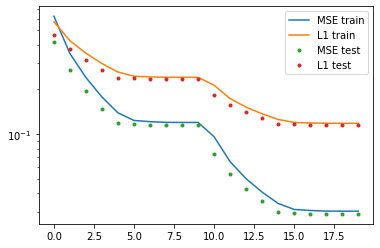

In [17]:
import matplotlib.pyplot as plt
plt.semilogy(m.net.log_dict['loss'], label='MSE train')
plt.semilogy(m.net.log_dict['loss_l1'], label='L1 train')
plt.semilogy(m.net.log_dict['loss_test'], '.',label='MSE test')
plt.semilogy(m.net.log_dict['loss_l1_test'], '.',label='L1 test')
plt.legend()

In [18]:
out = m.predict(test)

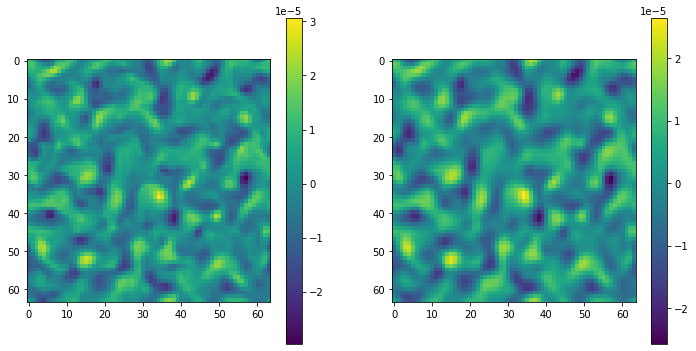

In [19]:
fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(out['q'].isel(run=-1,time=-1,lev=0))
plt.colorbar()
plt.subplot(122)
plt.imshow(out['q_predictions'].isel(run=-1,time=-1,lev=0))
plt.colorbar()

# cGAN regularized models

In [12]:
train = pse.Dataset('/scratch/pp2681/pyqg_NN/mean_var/train.nc')
test = pse.Dataset('/scratch/pp2681/pyqg_NN/mean_var/test.nc')
transfer=pse.Dataset('/scratch/zanna/data/pyqg/data/transfer/*.nc')
inputs = [('q',0), ('q',1)]
targets = [('q_forcing_advection', 0), ('q_forcing_advection', 1)]

In [3]:
cgan = CGANModel(inputs, targets)
stats = cgan.fit(test.isel(run=slice(0,1)), test.isel(run=slice(3,4)), num_epochs=200, batch_size=4)

Training starts on device cuda:0, number of samples 87
[1/200] [2.27/450.78] D_loss: -8.02 G_loss: -14.89 L2: [1.026,1.028] L2_q: [3.081,3.234] L2_dq: [0.991,0.990]
[2/200] [2.07/428.91] D_loss: -26.57 G_loss: -35.72 L2: [1.060,1.061] L2_q: [2.452,2.467] L2_dq: [1.204,1.211]
[3/200] [2.05/419.01] D_loss: -19.08 G_loss: 29.35 L2: [1.061,1.066] L2_q: [2.162,2.191] L2_dq: [1.209,1.174]
[4/200] [2.03/411.93] D_loss: -14.26 G_loss: 18.58 L2: [1.006,1.008] L2_q: [1.857,1.934] L2_dq: [1.786,1.886]
[5/200] [2.00/405.84] D_loss: -4.37 G_loss: 12.52 L2: [0.993,0.997] L2_q: [2.575,2.654] L2_dq: [2.251,2.244]
[6/200] [2.03/402.11] D_loss: -7.63 G_loss: 26.54 L2: [0.984,0.985] L2_q: [1.843,1.897] L2_dq: [1.731,1.769]
[7/200] [2.03/398.96] D_loss: -8.21 G_loss: 19.16 L2: [0.979,0.980] L2_q: [1.210,1.248] L2_dq: [1.282,1.306]
[8/200] [2.00/395.24] D_loss: -3.55 G_loss: 13.10 L2: [0.995,0.996] L2_q: [1.983,2.073] L2_dq: [1.746,1.835]
[9/200] [2.00/391.93] D_loss: -9.03 G_loss: 11.65 L2: [0.982,0.985] 

[75/200] [2.13/254.61] D_loss: -13.59 G_loss: 15.13 L2: [0.816,0.819] L2_q: [0.948,0.925] L2_dq: [1.048,0.985]
[76/200] [2.08/252.64] D_loss: -14.44 G_loss: 14.30 L2: [0.802,0.807] L2_q: [0.798,0.785] L2_dq: [0.997,0.970]
[77/200] [2.07/250.65] D_loss: -14.52 G_loss: 16.15 L2: [0.844,0.847] L2_q: [1.091,1.108] L2_dq: [1.261,1.251]
[78/200] [2.09/248.68] D_loss: -14.29 G_loss: 15.82 L2: [0.854,0.861] L2_q: [1.121,1.145] L2_dq: [1.169,1.156]
[79/200] [2.12/246.77] D_loss: -14.36 G_loss: 15.12 L2: [0.799,0.805] L2_q: [0.849,0.841] L2_dq: [1.132,1.077]
[80/200] [2.08/244.80] D_loss: -14.39 G_loss: 17.96 L2: [0.793,0.798] L2_q: [0.940,0.936] L2_dq: [1.343,1.309]
[81/200] [2.10/242.85] D_loss: -14.18 G_loss: 20.40 L2: [0.794,0.800] L2_q: [1.033,1.025] L2_dq: [1.453,1.386]
[82/200] [2.01/240.78] D_loss: -14.93 G_loss: 20.23 L2: [0.795,0.801] L2_q: [0.858,0.831] L2_dq: [1.178,1.128]
[83/200] [2.04/238.74] D_loss: -14.77 G_loss: 20.62 L2: [0.794,0.799] L2_q: [0.975,0.973] L2_dq: [1.291,1.242]
[

[149/200] [2.01/103.85] D_loss: -13.35 G_loss: 14.28 L2: [0.644,0.660] L2_q: [0.475,0.479] L2_dq: [0.885,0.883]
[150/200] [2.06/101.82] D_loss: -13.67 G_loss: 13.23 L2: [0.637,0.651] L2_q: [0.590,0.571] L2_dq: [1.053,1.007]
[151/200] [2.09/99.81] D_loss: -13.61 G_loss: 14.49 L2: [0.632,0.647] L2_q: [0.507,0.505] L2_dq: [0.970,0.954]
[152/200] [2.12/97.80] D_loss: -13.56 G_loss: 15.44 L2: [0.627,0.643] L2_q: [0.469,0.491] L2_dq: [0.958,0.939]
[153/200] [2.10/95.78] D_loss: -13.51 G_loss: 14.95 L2: [0.627,0.641] L2_q: [0.455,0.451] L2_dq: [0.895,0.831]
[154/200] [2.11/93.76] D_loss: -13.59 G_loss: 15.96 L2: [0.625,0.639] L2_q: [0.469,0.460] L2_dq: [0.920,0.860]
[155/200] [2.06/91.73] D_loss: -13.54 G_loss: 17.91 L2: [0.627,0.641] L2_q: [0.462,0.459] L2_dq: [0.829,0.813]
[156/200] [2.05/89.70] D_loss: -13.27 G_loss: 15.26 L2: [0.621,0.636] L2_q: [0.426,0.424] L2_dq: [0.771,0.757]
[157/200] [2.01/87.65] D_loss: -13.54 G_loss: 15.24 L2: [0.620,0.634] L2_q: [0.455,0.460] L2_dq: [0.861,0.821]

In [13]:
#cgan.net.cpu()
#torch.save(cgan, 'net_state')
#stats.to_netcdf('stats.nc')

In [18]:
cgan = torch.load('net_state')
stats = xr.open_dataset('stats.nc')

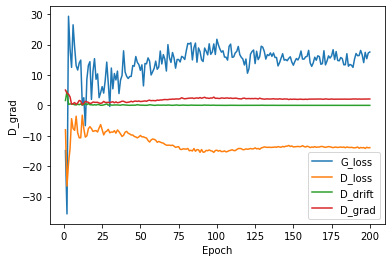

In [4]:
for key in ['G_loss', 'D_loss', 'D_drift', 'D_grad']:
    stats[key].plot(label=key)
plt.legend()

(0.0, 4.0)

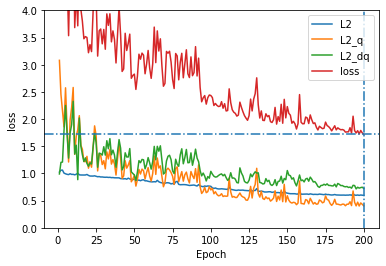

In [14]:
for key in ['L2', 'L2_q', 'L2_dq', 'loss']:
    stats[key].plot(label=key)
plt.axhline(y=stats.loss_opt, ls='-.')
plt.axvline(x=stats.Epoch_opt, ls='-.')
plt.legend()
plt.ylim([0,4])

In [32]:
predict = cgan.predict(test.isel(run=slice(2,3)), ensemble_size=16, stats=stats)

Prediction is given for Epoch=200


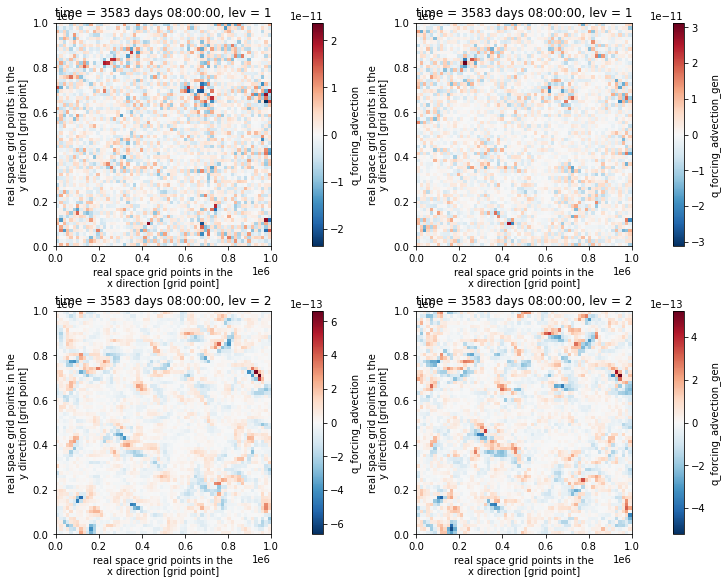

In [184]:
fig, ax = plt.subplots(2,2, constrained_layout=True, figsize=(10,8))
predict.q_forcing_advection.isel(run=0,time=-1,lev=0).plot(ax=ax[0][0])
predict.q_forcing_advection_gen.isel(run=0,time=-1,lev=0).plot(ax=ax[0][1])

predict.q_forcing_advection.isel(run=0,time=-1,lev=1).plot(ax=ax[1][0])
predict.q_forcing_advection_gen.isel(run=0,time=-1,lev=1).plot(ax=ax[1][1])

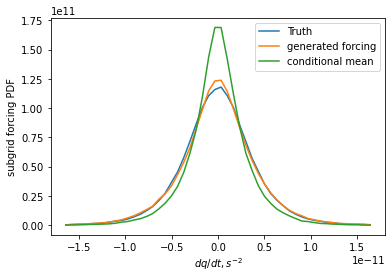

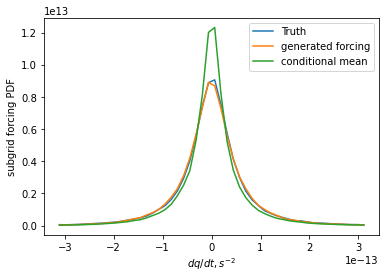

In [198]:
plt.figure()
for key, label in [('PDF0', 'Truth'), ('PDF_gen0', 'generated forcing'), ('PDF_gen_mean0', 'conditional mean')]:
    predict[key].plot(label=label)
plt.legend()
plt.figure()
for key, label in [('PDF1', 'Truth'), ('PDF_gen1', 'generated forcing'), ('PDF_gen_mean1', 'conditional mean')]:
    predict[key].plot(label=label)
plt.legend()

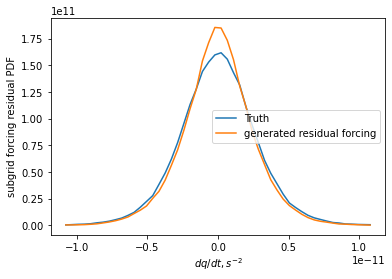

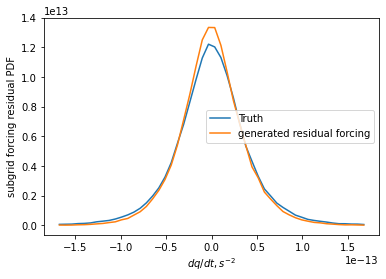

In [199]:
plt.figure()
for key, label in [('PDF_res0', 'Truth'), ('PDF_gen_res0', 'generated residual forcing')]:
    predict[key].plot(label=label)
plt.legend()
plt.figure()
for key, label in [('PDF_res1', 'Truth'), ('PDF_gen_res1', 'generated residual forcing')]:
    predict[key].plot(label=label)
plt.legend()

Text(0.5, 1.0, 'Lower Layer')

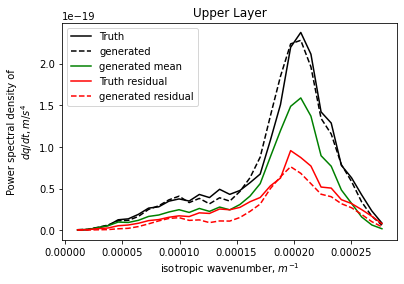

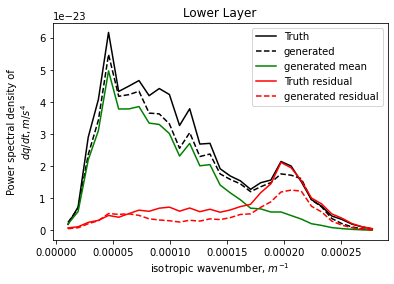

In [28]:
plt.figure()
for key, label, ls, color in [('PSD', 'Truth', '-', 'k'), 
                   ('PSD_gen', 'generated', '--', 'k'), 
                   ('PSD_gen_mean', 'generated mean', '-', 'g'),
                   ('PSD_res', 'Truth residual' , '-', 'r'),
                   ('PSD_gen_res', 'generated residual' , '--', 'r')]:
    predict[key].isel(lev=0).plot(label=label, ls=ls, color=color)
plt.legend()
plt.title('Upper Layer')

plt.figure()
for key, label, ls, color in [('PSD', 'Truth', '-', 'k'), 
                   ('PSD_gen', 'generated', '--', 'k'), 
                   ('PSD_gen_mean', 'generated mean', '-', 'g'),
                   ('PSD_res', 'Truth residual' , '-', 'r'),
                   ('PSD_gen_res', 'generated residual' , '--', 'r')]:
    predict[key].isel(lev=1).plot(label=label, ls=ls, color=color)
plt.legend()
plt.title('Lower Layer')

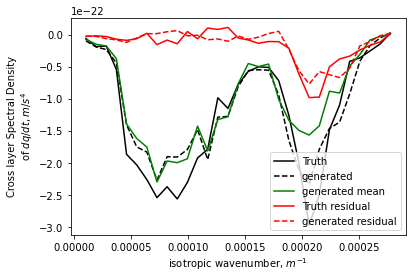

In [34]:
plt.figure()
for key, label, ls, color in [('CSD', 'Truth', '-', 'k'), 
                   ('CSD_gen', 'generated', '--', 'k'), 
                   ('CSD_gen_mean', 'generated mean', '-', 'g'),
                   ('CSD_res', 'Truth residual' , '-', 'r'),
                   ('CSD_gen_res', 'generated residual' , '--', 'r')]:
    predict[key].plot(label=label, ls=ls, color=color)
plt.legend()

Text(0.5, 1.0, 'Lower Layer')

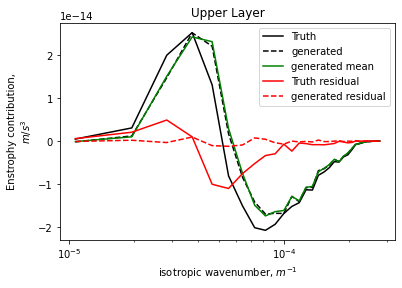

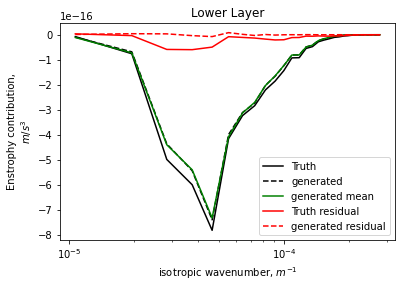

In [29]:
plt.figure()
for key, label, ls, color in [('Zflux', 'Truth', '-', 'k'), 
                   ('Zflux_gen', 'generated', '--', 'k'), 
                   ('Zflux_gen_mean', 'generated mean', '-', 'g'),
                   ('Zflux_res', 'Truth residual' , '-', 'r'),
                   ('Zflux_gen_res', 'generated residual' , '--', 'r')]:
    predict[key].isel(lev=0).plot(label=label, ls=ls, color=color, xscale='log')
plt.legend()
plt.title('Upper Layer')

plt.figure()
for key, label, ls, color in [('Zflux', 'Truth', '-', 'k'), 
                   ('Zflux_gen', 'generated', '--', 'k'), 
                   ('Zflux_gen_mean', 'generated mean', '-', 'g'),
                   ('Zflux_res', 'Truth residual' , '-', 'r'),
                   ('Zflux_gen_res', 'generated residual' , '--', 'r')]:
    predict[key].isel(lev=1).plot(label=label, ls=ls, color=color, xscale='log')
plt.legend()
plt.title('Lower Layer')

# Mean-Var Model

In [98]:
inputs = [('q',0), ('q',1)]
targets = [('q_forcing_advection', 0), ('q_forcing_advection', 1)]

In [99]:
mvmodel = MeanVarModel(inputs, targets)

In [100]:
mvmodel.fit(train, test, num_epochs=10, batch_size=64, learning_rate=0.001)

Training starts on device cuda:0, number of samples 21750
Epoch: 1, Loss: 0.3570435514066411, Epoch time: 49.23673629760742, ETA: 443.1306438446045
Epoch: 2, Loss: 0.13522826501692847, Epoch time: 49.22972273826599, ETA: 393.86660957336426
Epoch: 3, Loss: 0.11402813646642641, Epoch time: 49.152440547943115, ETA: 344.4460644721985
Epoch: 4, Loss: 0.1043168529183015, Epoch time: 49.172760009765625, ETA: 295.18902826309204
Epoch: 5, Loss: 0.09926761516003774, Epoch time: 49.22400617599487, ETA: 246.01688647270203
Epoch: 6, Loss: 0.09348682053267271, Epoch time: 49.21944189071655, ETA: 196.82434908548993
Epoch: 7, Loss: 0.0926270658072384, Epoch time: 49.2080020904541, ETA: 147.61916255950928
Epoch: 8, Loss: 0.09197936825094552, Epoch time: 49.15380239486694, ETA: 98.39967584609985
Epoch: 9, Loss: 0.09182691492568487, Epoch time: 49.19205021858215, ETA: 49.19899320602419
Epoch: 10, Loss: 0.0918450010864214, Epoch time: 49.193936824798584, ETA: 0.0
Training starts on device cuda:0, number o

In [143]:
predict = mvmodel.predict(test)

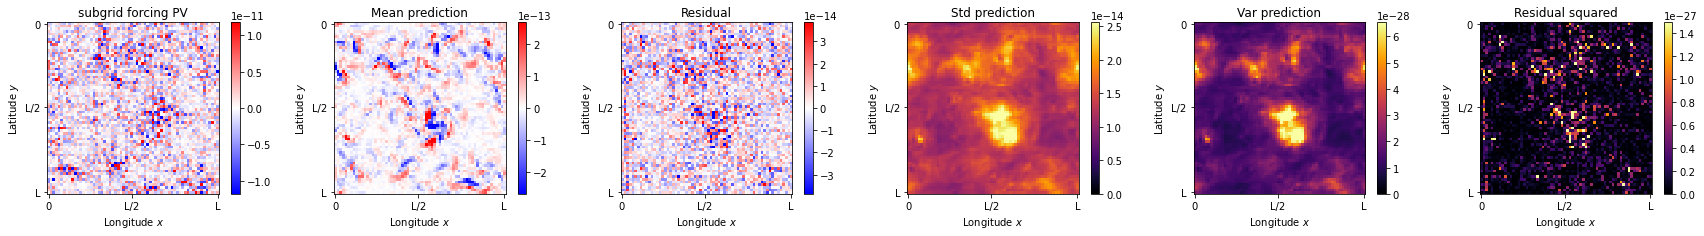

In [146]:
with pse.figure_grid(6,6) as g:
    for jfig in [14]:
        exp = predict
        g.next('subgrid forcing PV')
        pse.imshow(exp.q_forcing_advection.isel(run=0,time=-1,lev=0))
        g.next('Mean prediction')
        pse.imshow(exp.q_forcing_advection_mean.isel(run=0,time=-1,lev=1))
        g.next('Residual')
        pse.imshow(exp.q_forcing_advection_res.isel(run=0,time=-1,lev=1))
        g.next('Std prediction')
        pse.imshow(exp.q_forcing_advection_std.isel(run=0,time=-1,lev=1))
        g.next('Var prediction')
        pse.imshow(exp.q_forcing_advection_var.isel(run=0,time=-1,lev=1))
        g.next('Residual squared')
        pse.imshow(exp.q_forcing_advection_res_sqr.isel(run=0,time=-1,lev=1))

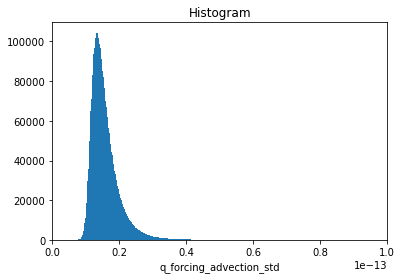

In [132]:
predict.q_forcing_advection_std.isel(time=range(47,87), lev=1).plot.hist(bins=1000, xlim=[0, 1e-13]);

(0.0, 1.0)

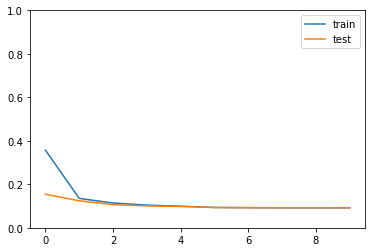

In [106]:
plt.plot(mvmodel.net_mean.log_dict['loss'], label='train')
plt.plot(mvmodel.net_mean.log_dict['loss_test'], label='test')
plt.legend()
plt.ylim([0,1])

(0.0, 2.0)

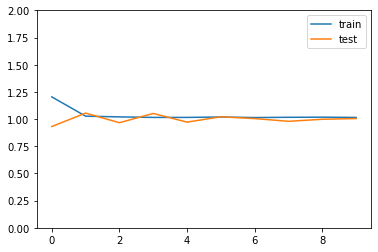

In [107]:
plt.plot(mvmodel.net_var.log_dict['spread_to_MSE'], label='train')
plt.plot(mvmodel.net_var.log_dict['spread_to_MSE_test'], label='test')
plt.legend()
plt.ylim([0,2])

(0.0, 1.0)

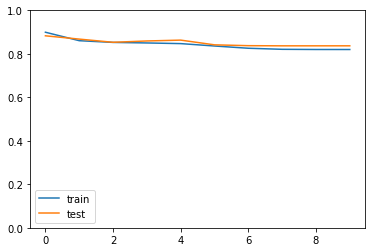

In [108]:
plt.plot(mvmodel.net_var.log_dict['loss'], label='train')
plt.plot(mvmodel.net_var.log_dict['loss_test'], label='test')
plt.legend()
plt.ylim([0,1])

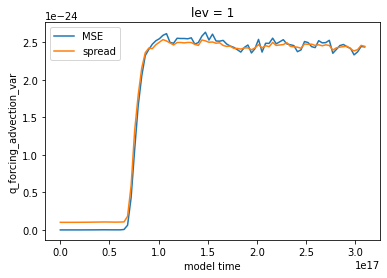

In [148]:
predict.q_forcing_advection_res_sqr.mean(dim=('x','y','run')).isel(lev=0).plot(label='MSE')
predict.q_forcing_advection_var.mean(dim=('x','y','run')).isel(lev=0).plot(label='spread')
plt.legend()

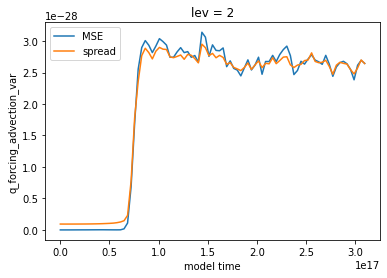

In [149]:
predict.q_forcing_advection_res_sqr.mean(dim=('x','y','run')).isel(lev=1).plot(label='MSE')
predict.q_forcing_advection_var.mean(dim=('x','y','run')).isel(lev=1).plot(label='spread')
plt.legend()

In [135]:
spread.mean().values / MSE.mean().values

1.0088649

# Test trained mean_var_model

In [22]:
model = torch.load('/scratch/pp2681/pyqg_NN/mean_var/net_state', map_location='cpu')

(0.0, 0.5)

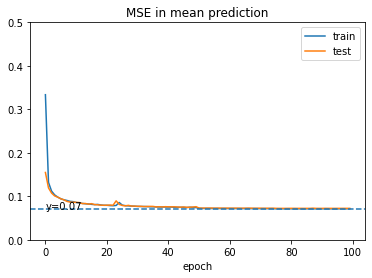

In [29]:
plt.plot(model.net_mean.log_dict['loss'], label='train')
plt.plot(model.net_mean.log_dict['loss_test'], label='test')
plt.legend()
plt.xlabel('epoch')
plt.title('MSE in mean prediction')
plt.axhline(y=0.07, ls='--')
plt.text(0,0.07,'y=0.07')
plt.ylim([0, 0.5])

Text(0.5, 1.0, 'MSE in residual squared')

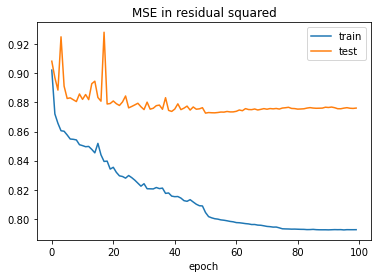

In [44]:
plt.plot(model.net_var.log_dict['loss'], label='train')
plt.plot(model.net_var.log_dict['loss_test'], label='test')
plt.legend()
plt.xlabel('epoch')
plt.title('MSE in residual squared')

Text(0.5, 1.0, 'Noise variance / MSE')

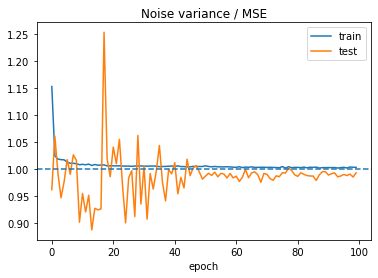

In [47]:
plt.plot(model.net_var.log_dict['spread_to_MSE'], label='train')
plt.plot(model.net_var.log_dict['spread_to_MSE_test'], label='test')
plt.axhline(y=1, linestyle='--')
plt.legend()
plt.xlabel('epoch')
plt.title('Noise variance / MSE')

In [32]:
import xarray as xr
predict = xr.open_dataset('/scratch/pp2681/pyqg_NN/mean_var/train.nc')

Text(0, 0.5, '')

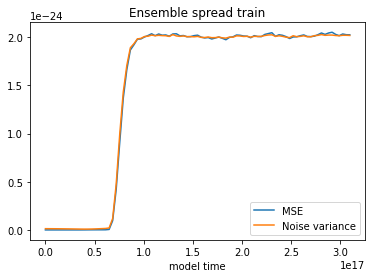

In [52]:
predict.q_forcing_advection_res_sqr.mean(dim=('x','y','run')).isel(lev=0).plot(label='MSE')
predict.q_forcing_advection_var.mean(dim=('x','y','run')).isel(lev=0).plot(label='Noise variance')
plt.legend()
plt.title('Ensemble spread train')
plt.ylabel('')

In [6]:
import xarray as xr
predict = xr.open_dataset('/scratch/pp2681/pyqg_NN/mean_var/test.nc')

Text(0, 0.5, '')

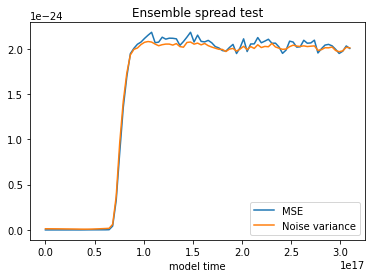

In [55]:
predict.q_forcing_advection_res_sqr.mean(dim=('x','y','run')).isel(lev=0).plot(label='MSE')
predict.q_forcing_advection_var.mean(dim=('x','y','run')).isel(lev=0).plot(label='Noise variance')
plt.legend()
plt.title('Ensemble spread test')
plt.ylabel('')

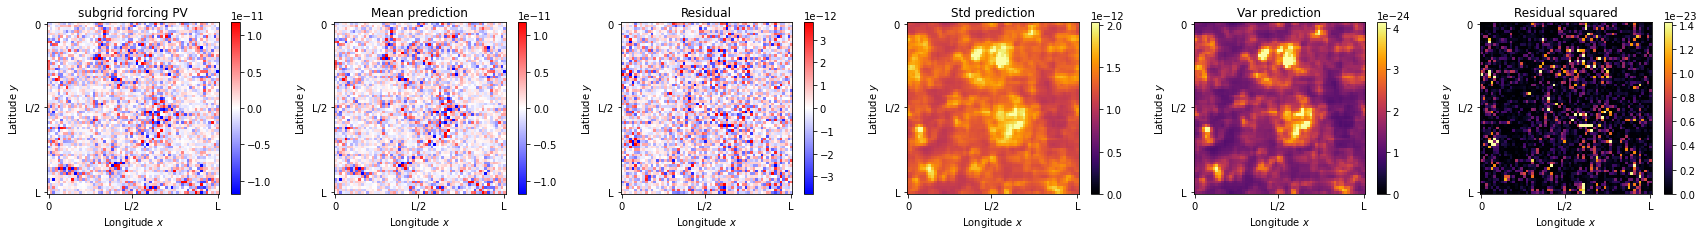

In [56]:
with pse.figure_grid(6,6) as g:
    for jfig in [14]:
        exp = predict
        g.next('subgrid forcing PV')
        pse.imshow(exp.q_forcing_advection.isel(run=0,time=-1,lev=0))
        g.next('Mean prediction')
        pse.imshow(exp.q_forcing_advection_mean.isel(run=0,time=-1,lev=0))
        g.next('Residual')
        pse.imshow(exp.q_forcing_advection_res.isel(run=0,time=-1,lev=0))
        g.next('Std prediction')
        pse.imshow(exp.q_forcing_advection_std.isel(run=0,time=-1,lev=0))
        g.next('Var prediction')
        pse.imshow(exp.q_forcing_advection_var.isel(run=0,time=-1,lev=0))
        g.next('Residual squared')
        pse.imshow(exp.q_forcing_advection_res_sqr.isel(run=0,time=-1,lev=0))

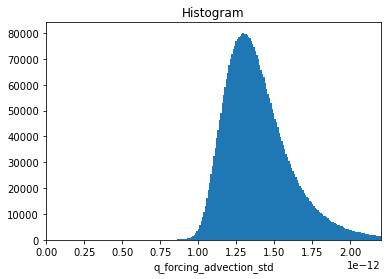

In [9]:
predict.q_forcing_advection_std.isel(time=range(47,87), lev=0).plot.hist(bins=1000, xlim=(0,2.2e-12));

In [24]:
train

wrapper around
<xarray.Dataset>
Dimensions:                       (run: 250, time: 87, lev: 2, y: 64, x: 64)
Coordinates:
  * time                          (time) timedelta64[ns] 0 days 00:00:00 ... ...
  * x                             (x) float32 7.812e+03 2.344e+04 ... 9.922e+05
  * y                             (y) float32 7.812e+03 2.344e+04 ... 9.922e+05
  * lev                           (lev) int32 1 2
Dimensions without coordinates: run
Data variables:
    q_forcing_advection           (run, time, lev, y, x) float32 dask.array<chunksize=(250, 87, 2, 64, 64), meta=np.ndarray>
    q                             (run, time, lev, y, x) float32 dask.array<chunksize=(250, 87, 2, 64, 64), meta=np.ndarray>
    q_forcing_advection_res       (run, time, lev, y, x) float32 dask.array<chunksize=(250, 87, 2, 64, 64), meta=np.ndarray>
    q_forcing_advection_res_sqr   (run, time, lev, y, x) float32 dask.array<chunksize=(250, 87, 2, 64, 64), meta=np.ndarray>
    q_forcing_advection_mean      (run, time, lev, y, x) float32 dask.array<chunksize=(250, 87, 2, 64, 64), meta=np.ndarray>
    q_forcing_advection_var       (run, time, lev, y, x) float32 dask.array<chunksize=(250, 87, 2, 64, 64), meta=np.ndarray>
    q_forcing_advection_std       (run, time, lev, y, x) float32 dask.array<chunksize=(250, 87, 2, 64, 64), meta=np.ndarray>
    q_forcing_advection_res_mean  (run, time, lev, y, x) float32 dask.array<chunksize=(250, 87, 2, 64, 64), meta=np.ndarray>

# CGAN convergence check

In [4]:
import torch
import json
import numpy as np

In [3]:
def print_training(exp, Nepochs=400, ylim=(0,1)):
    model = torch.load(f'/scratch/pp2681/pyqg_NN/CGAN_residual_track/{exp}/net_state', map_location='cpu')
    with open(f'/scratch/pp2681/pyqg_NN/CGAN_residual_track/{exp}/args.json') as f:
        args = json.load(f)
    fig = plt.figure(figsize=(14,4))
    fig.suptitle(args)
    
    plt.subplot(131)
    for key in model.net.optim_loss.keys():
        y = np.array(model.net.optim_loss[key])
        x = np.arange(len(y))/340
        n = int(len(y)/340)
        yy = np.zeros(n)
        xx = np.zeros(n)
        for j in range(n):
            yy[j] = np.mean(y[340*j:340*(j+1)])
            xx[j] = np.mean(x[340*j:340*(j+1)])
        plt.plot(xx,yy, label=key)
    plt.xlabel('Epoch')
    plt.ylabel('Optimization losses')
    plt.legend(ncol=2)
    plt.xlim([0, Nepochs])
    plt.ylim([-20, 20])
    
    plt.subplot(132)
    plt.plot(model.net.log_dict['MSE_wrt_mean_train'], label='train')
    plt.plot(model.net.log_dict['MSE_wrt_mean_test'], label='test')
    plt.ylim([0, 1])
    plt.xlim([0, Nepochs])
    plt.xlabel('Epoch')
    plt.legend()
    plt.axhline(y=0.07, ls='--')
    plt.text(0,0.07,'y=0.07, regression limit')
    plt.title('MSE in conditional mean')
    
    plt.subplot(133)
    plt.plot(model.net.log_dict['MSE_wrt_var_train'], label='train')
    plt.plot(model.net.log_dict['MSE_wrt_var_test'], label='test')
    plt.ylim(ylim)
    plt.xlim([0, Nepochs])
    plt.xlabel('Epoch')
    plt.legend()
    plt.title('MSE in conditional var')

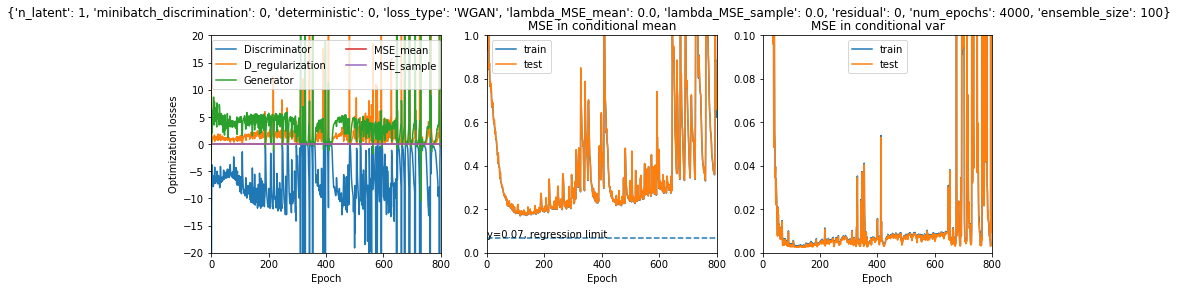

In [164]:
print_training('EXP1', 800, ylim=[0,0.1])

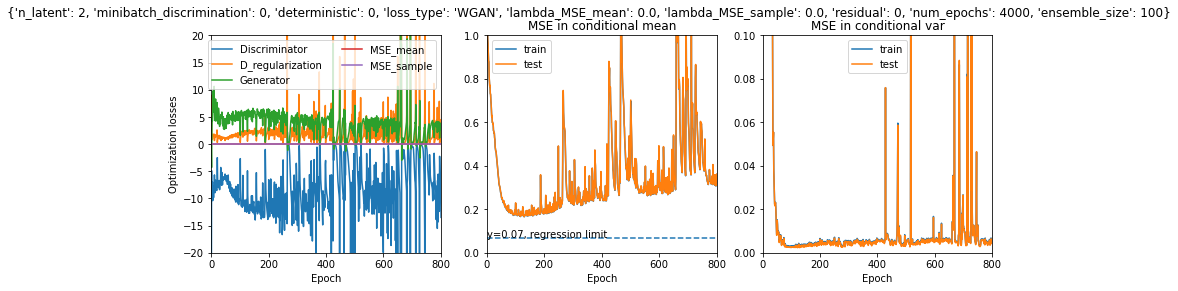

In [165]:
print_training('EXP2', 800, ylim=[0,0.1])

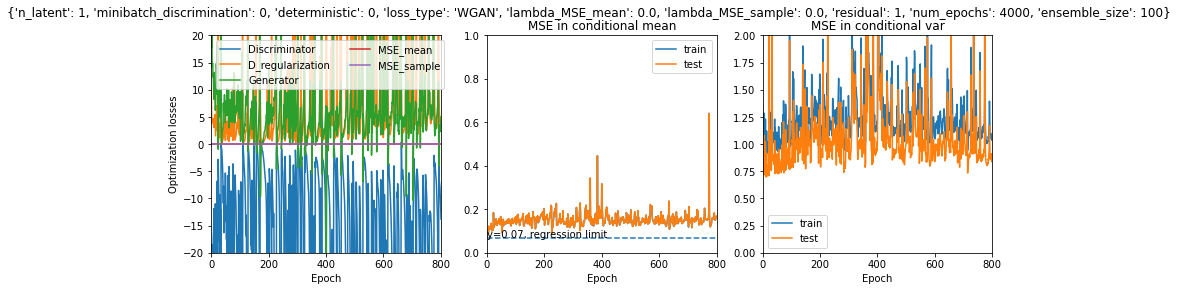

In [166]:
print_training('EXP5', 800, ylim=[0,2])

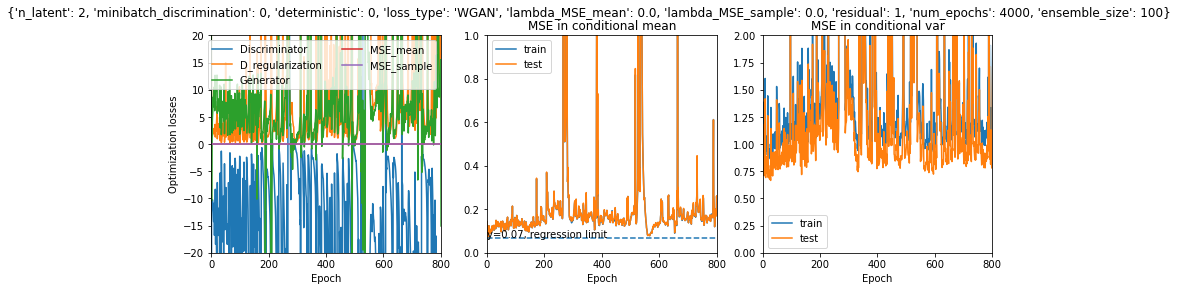

In [167]:
print_training('EXP6', 800, ylim=[0,2])

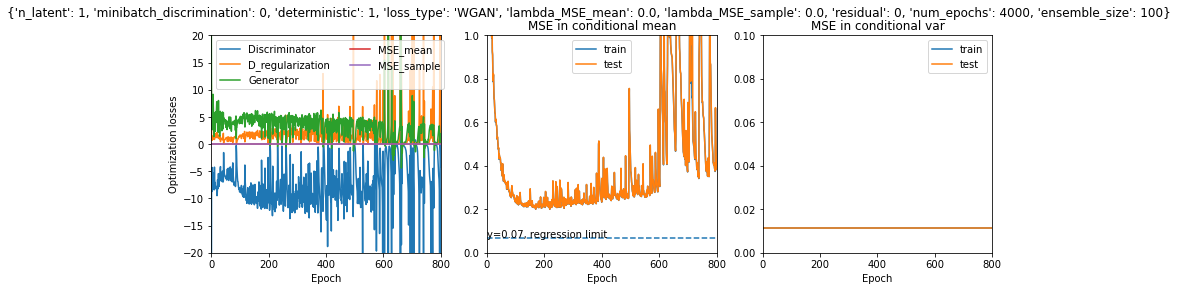

In [170]:
print_training('EXP9', 800, ylim=[0,0.1])

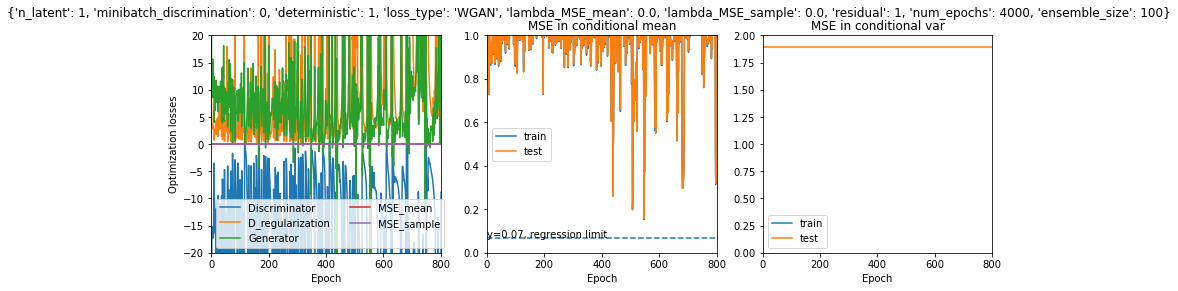

In [169]:
print_training('EXP10', 800, ylim=[0,2])

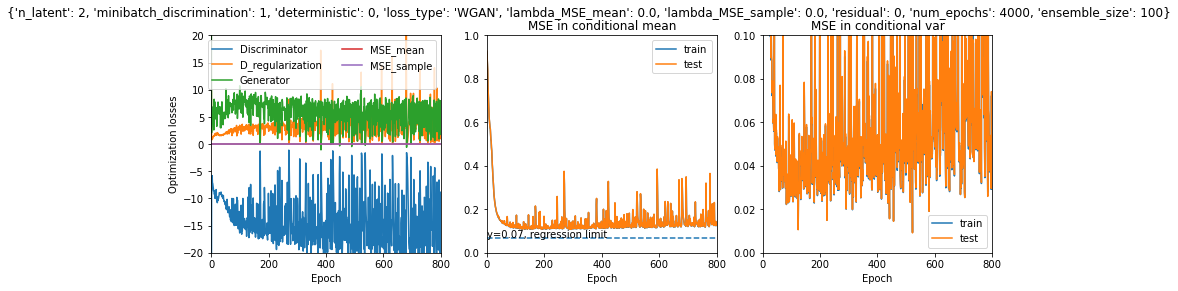

In [7]:
print_training('EXP4', 800, ylim=[0,0.1])

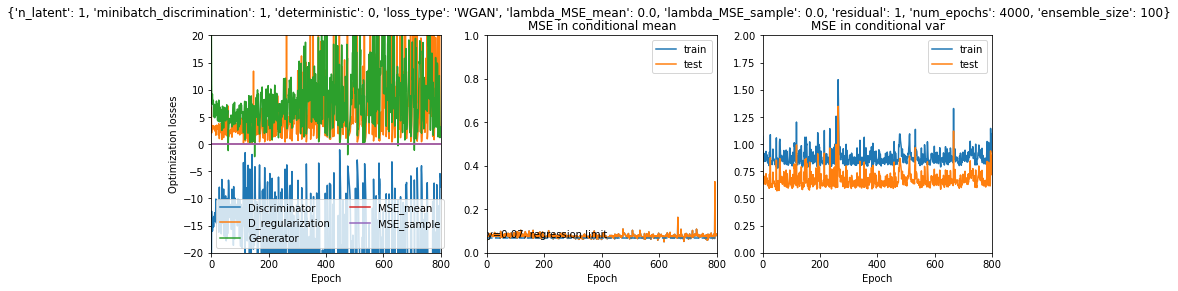

In [9]:
print_training('EXP7', 800, ylim=[0,2])

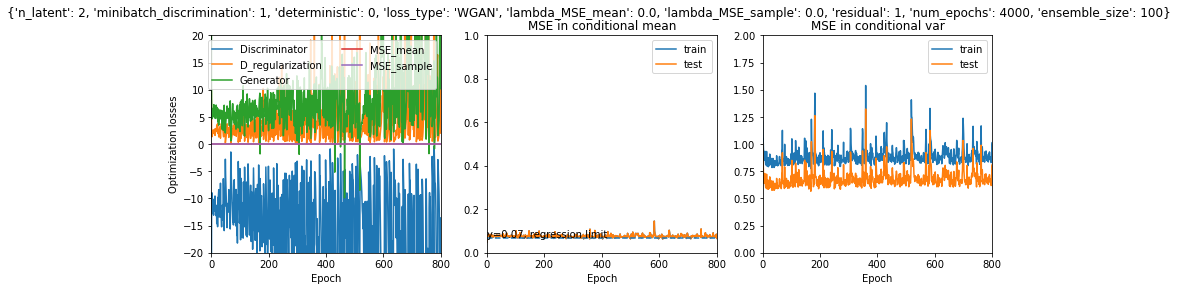

In [12]:
print_training('EXP8', 800, ylim=[0,2])

# CGAN new convergence check

In [21]:
def print_training(exp, Nepochs=400, ylims=[(1, 10000), (0,1), (0,10)], residual=False, folder='CGAN_residual_track_Jun03'):
    model = torch.load(f'/scratch/pp2681/pyqg_NN/{folder}/{exp}/net_state', map_location='cpu')
    with open(f'/scratch/pp2681/pyqg_NN/{folder}/{exp}/args.json') as f:
        args = json.load(f)
    fig = plt.figure(figsize=(14,4))
    def mrk_prms(line):
        return {'marker': 'o', 'markersize': 6, 'ls': '', 'markerfacecolor': 'None', 'color': line[0]._color, 'markevery': 20}
    
    plt.subplot(131)
    for key in ['Discriminator', 'Generator', 'D_regularization', 'D_drift', 'D_grad']:
        try:
            plt.semilogy(np.abs(model.net.optim_loss[key]), label=key)
        except:
            pass
    plt.xlabel('Epoch')
    plt.ylabel('Modulus of Optimization losses')
    plt.legend()
    plt.xlim([0, Nepochs])
    plt.ylim(ylims[0])
    plt.title('Training losses')
    
    plt.subplot(132)
    if residual:
        alpha = 0.07
    else:
        alpha = 1
    y = np.array(model.net.log_dict['MSE'])
    line = plt.plot(alpha*y, label='MSE')
    plt.plot(alpha*np.array(model.net.log_dict['MSE_test']), label='(test)', **mrk_prms(line))
    plt.axhline(y=0.07, ls='-.', color='k')
    plt.text(0,0.07,'y=0.07, regression limit')
    MSE_min = y[-1]*alpha
    plt.axhline(y=MSE_min, ls='-.', color=line[0]._color)
    plt.text(0,MSE_min,f'y={round(MSE_min,2)}')
    
    line = plt.plot(alpha*np.array(model.net.log_dict['MSE_mean_to_mean']), label=r'MSE $ \frac{1}{n}\sum_i y_i$ to $E(y|x)$')
    plt.plot(alpha*np.array(model.net.log_dict['MSE_mean_to_mean_test']), **mrk_prms(line))
    
    plt.ylim(ylims[1])
    plt.xlim([0, Nepochs])
    plt.xlabel('Epoch')
    plt.legend(ncol=2)
    plt.title('MSE validation')
    
    plt.subplot(133)
    line = plt.plot(model.net.log_dict['quality_target'], label='noise var / true var')
    plt.plot(model.net.log_dict['quality_target_test'], **mrk_prms(line))
    plt.axhline(y=1, ls='-.', color='k')
    plt.text(0,1,'y=1, ideal quality')
    
    line = plt.plot(model.net.log_dict['quality'], label='noise var / MSE')
    plt.plot(model.net.log_dict['quality_test'], **mrk_prms(line))
    
    line = plt.plot(model.net.log_dict['L2_var'], label='L2 in var field')
    plt.plot(model.net.log_dict['L2_var_test'], **mrk_prms(line))
    
    plt.ylim(ylims[2])
    plt.xlim([0, Nepochs])
    plt.xlabel('Epoch')
    plt.legend()
    plt.title('Noise variance validation')

Text(0.5, 1.05, 'WGAN-GP, 1 latent field, no minibatch')

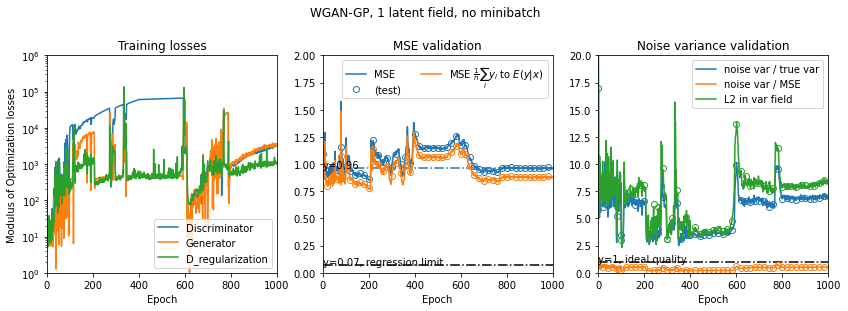

In [22]:
print_training('EXP1', 1000, ylims=[(1,1e+6), (0,2), (0,20)])
plt.suptitle('WGAN-GP, 1 latent field, no minibatch', y=1.05)

Text(0.5, 1.05, 'WGAN-GP, 2 latent fields, no minibatch')

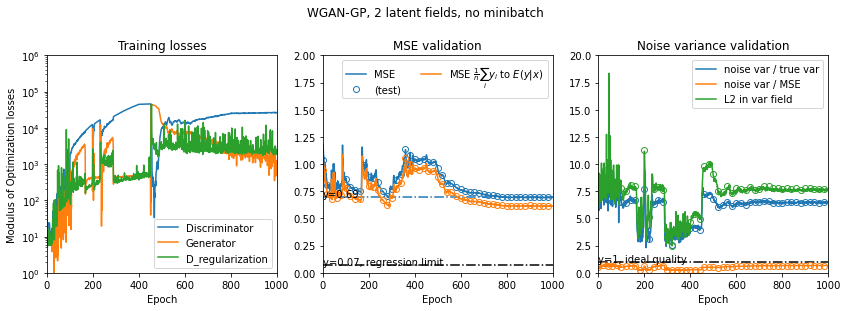

In [19]:
print_training('EXP2', 1000, ylims=[(1,1e+6), (0,2), (0,20)])
plt.suptitle('WGAN-GP, 2 latent fields, no minibatch', y=1.05)

Text(0.5, 1.05, 'WGAN-GP, 1 latent field, minibatch')

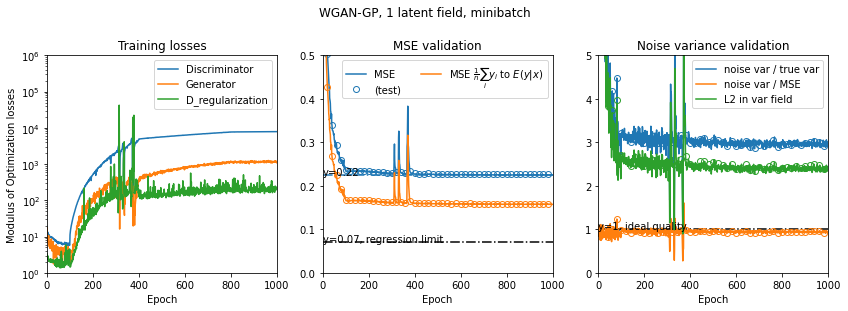

In [202]:
print_training('EXP3', 1000, ylims=[(1,1e+6), (0,0.5), (0,5)])
plt.suptitle('WGAN-GP, 1 latent field, minibatch', y=1.05)

Text(0.5, 1.05, 'WGAN-GP, 2 latent field, minibatch')

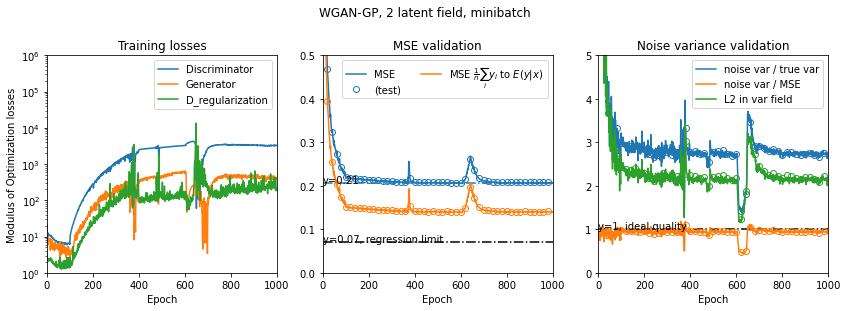

In [203]:
print_training('EXP4', 1000, ylims=[(1,1e+6), (0,0.5), (0,5)])
plt.suptitle('WGAN-GP, 2 latent field, minibatch', y=1.05)

Text(0.5, 1.05, 'WGAN-GP, deterministic')

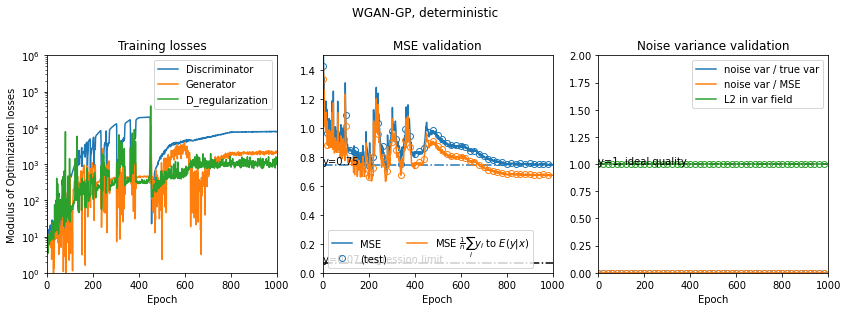

In [204]:
print_training('EXP5', 1000, ylims=[(1,1e+6), (0,1.5), (0,2)])
plt.suptitle('WGAN-GP, deterministic', y=1.05)

Text(0.5, 1.05, 'WGAN-GP, residual, 1 latent field, no minibatch')

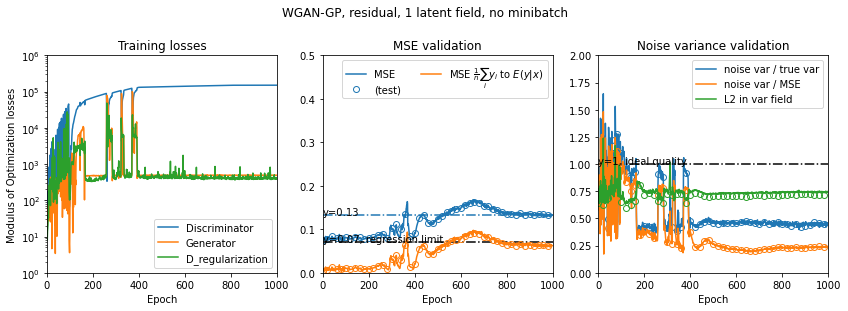

In [206]:
print_training('EXP6', 1000, ylims=[(1,1e+6), (0,0.5), (0,2)], residual=True)
plt.suptitle('WGAN-GP, residual, 1 latent field, no minibatch', y=1.05)

Text(0.5, 1.05, 'WGAN-GP, residual, 2 latent field, no minibatch')

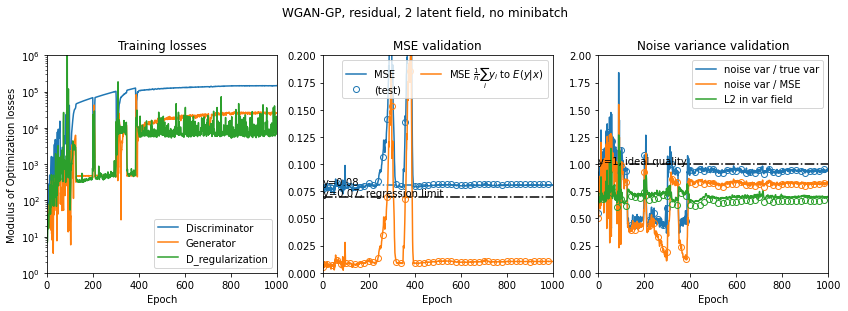

In [216]:
print_training('EXP7', 1000, ylims=[(1,1e+6), (0,0.2), (0,2)], residual=True)
plt.suptitle('WGAN-GP, residual, 2 latent field, no minibatch', y=1.05)

Text(0.5, 1.05, 'WGAN-GP, residual, 1 latent field, minibatch')

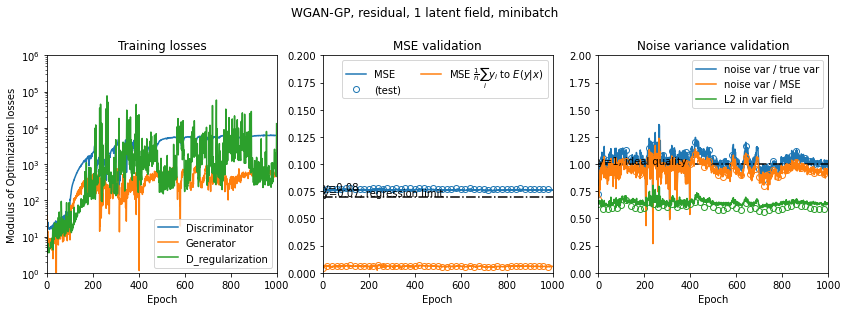

In [218]:
print_training('EXP8', 1000, ylims=[(1,1e+6), (0,0.2), (0,2)], residual=True)
plt.suptitle('WGAN-GP, residual, 1 latent field, minibatch', y=1.05)

Text(0.5, 1.05, 'WGAN-GP, residual, 2 latent field, minibatch')

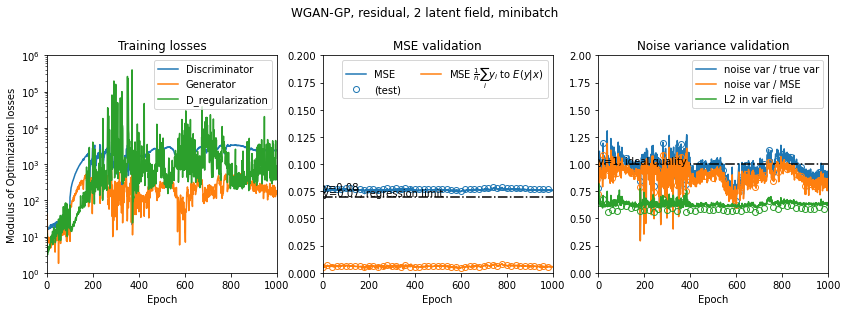

In [303]:
print_training('EXP9', 1000, ylims=[(1,1e+6), (0,0.2), (0,2)], residual=True)
plt.suptitle('WGAN-GP, residual, 2 latent field, minibatch', y=1.05)

Text(0.5, 1.05, 'WGAN-GP, residual, deterministic')

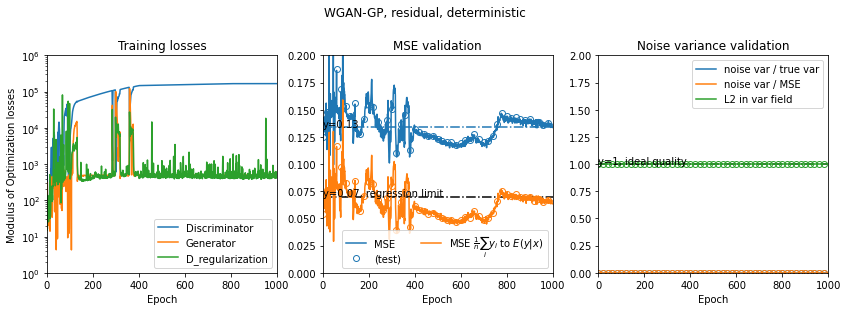

In [220]:
print_training('EXP10', 1000, ylims=[(1,1e+6), (0,0.2), (0,2)], residual=True)
plt.suptitle('WGAN-GP, residual, deterministic', y=1.05)

In [287]:
def plot_std(exp, run=1, time=-1, lev=1):
    import xarray as xr
    _slice = {'run':run, 'time':time, 'lev':lev}
    ds = xr.open_dataset(f'/scratch/pp2681/pyqg_NN/CGAN_residual_track_Jun03/{exp}/test.nc').isel(**_slice)
    ds_gt = xr.open_dataset('/scratch/pp2681/pyqg_NN/mean_var/test.nc').isel(**_slice)
    with pse.figure_grid(1,2) as g:
        g.next('WGAN, predicted std')
        try:
            pse.imshow(ds.q_forcing_advection_res_gen_std)
        except:
            pse.imshow(ds.q_forcing_advection_gen_std)
        g.next('Ground truth std')
        pse.imshow(ds_gt.q_forcing_advection_std)

WGAN with minibatch trained on subgrid forces


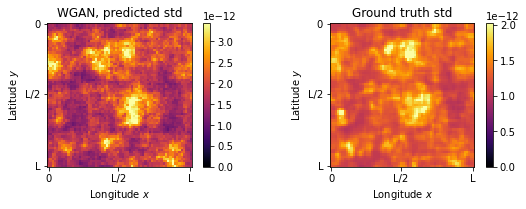

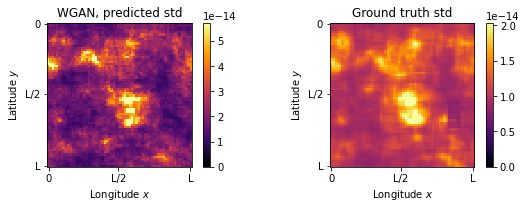

In [298]:
print('WGAN with minibatch trained on subgrid forces')
plot_std('EXP4', run=0, lev=0)
plot_std('EXP4', run=0, lev=1)

WGAN with minibatch trained on subgrid forces residuals}


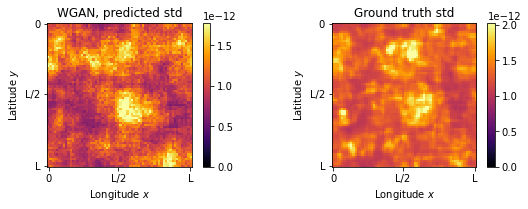

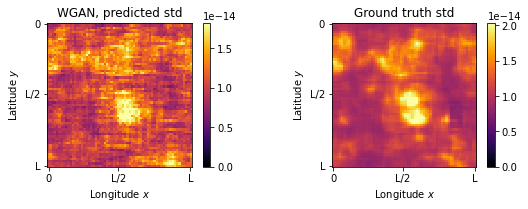

In [297]:
print('WGAN with minibatch trained on subgrid forces residuals}')
plot_std('EXP9', run=0, lev=0)
plot_std('EXP9', run=0, lev=1)

# After all bugs removed

Text(0.5, 1.05, 'WGAN-GP, BatchNorm')

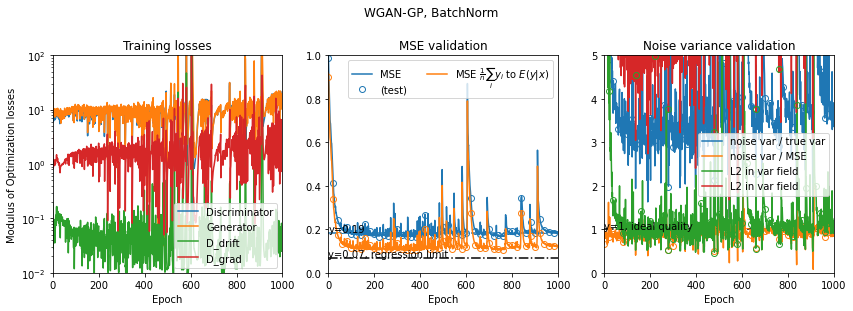

In [31]:
print_training('EXP1', 1000, ylims=[(1e-2,1e+2), (0,1.), (0,5)], residual=False, folder='CGAN_automatic')
plt.suptitle('WGAN-GP, BatchNorm', y=1.05)

Text(0.5, 1.05, 'WGAN-GP, LayerNorm')

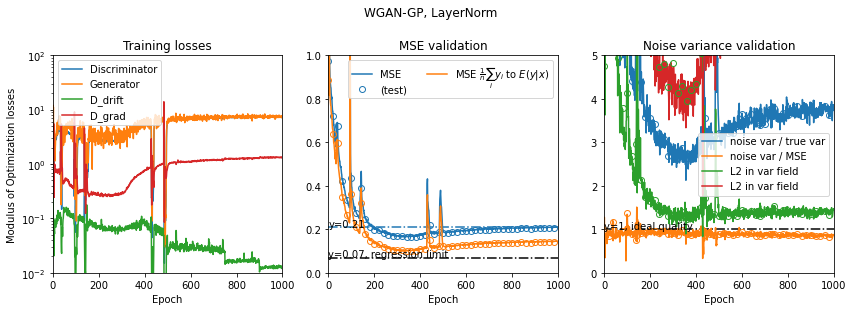

In [33]:
print_training('EXP2', 1000, ylims=[(1e-2,1e+2), (0,1.), (0,5)], residual=False, folder='CGAN_automatic')
plt.suptitle('WGAN-GP, LayerNorm', y=1.05)

Text(0.5, 1.05, 'WGAN-GP, InstanceNorm')

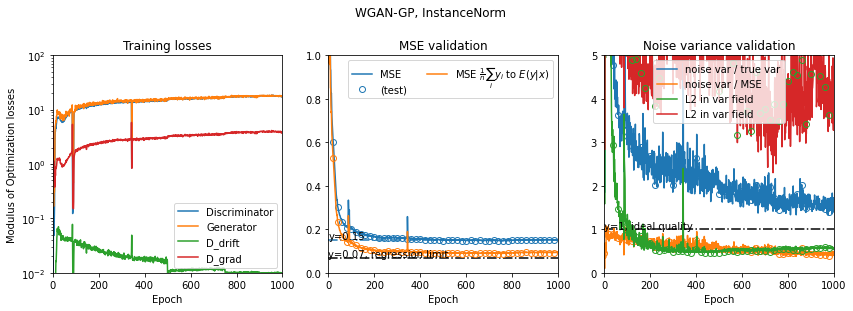

In [35]:
print_training('EXP3', 1000, ylims=[(1e-2,1e+2), (0,1.), (0,5)], residual=False, folder='CGAN_automatic')
plt.suptitle('WGAN-GP, InstanceNorm', y=1.05)

Text(0.5, 1.05, 'WGAN-GP, no BatchNorms')

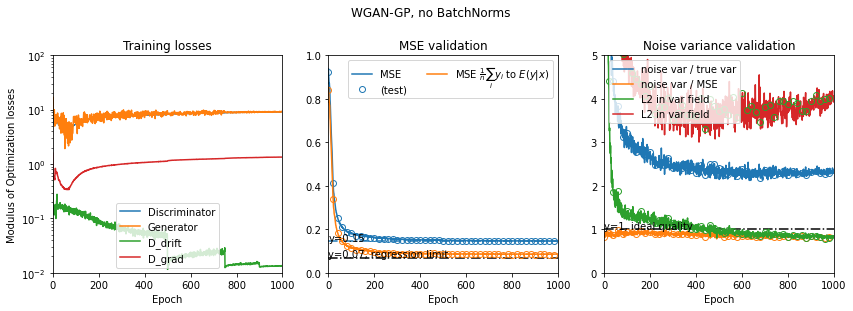

In [36]:
print_training('EXP4', 1000, ylims=[(1e-2,1e+2), (0,1.), (0,5)], residual=False, folder='CGAN_automatic')
plt.suptitle('WGAN-GP, no BatchNorms', y=1.05)

Text(0.5, 1.05, 'WGAN-GP, U-Net Generator BatchNorm')

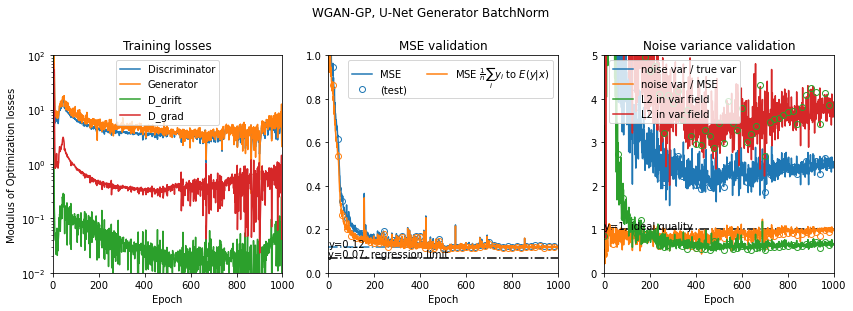

In [37]:
print_training('EXP5', 1000, ylims=[(1e-2,1e+2), (0,1.), (0,5)], residual=False, folder='CGAN_automatic')
plt.suptitle('WGAN-GP, U-Net Generator BatchNorm', y=1.05)

Text(0.5, 1.05, 'WGAN-GP, U-Net Generator LayerNorm')

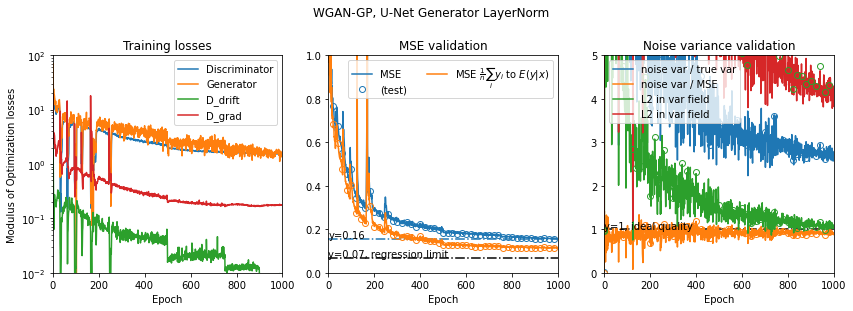

In [38]:
print_training('EXP6', 1000, ylims=[(1e-2,1e+2), (0,1.), (0,5)], residual=False, folder='CGAN_automatic')
plt.suptitle('WGAN-GP, U-Net Generator LayerNorm', y=1.05)

Text(0.5, 1.05, 'WGAN-GP, U-Net Generator InstanceNorm')

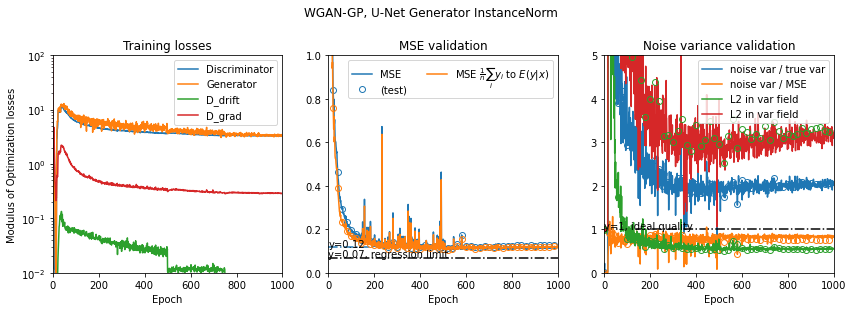

In [39]:
print_training('EXP7', 1000, ylims=[(1e-2,1e+2), (0,1.), (0,5)], residual=False, folder='CGAN_automatic')
plt.suptitle('WGAN-GP, U-Net Generator InstanceNorm', y=1.05)

Text(0.5, 1.05, 'WGAN-GP, U-Net Generator no BatchNorms')

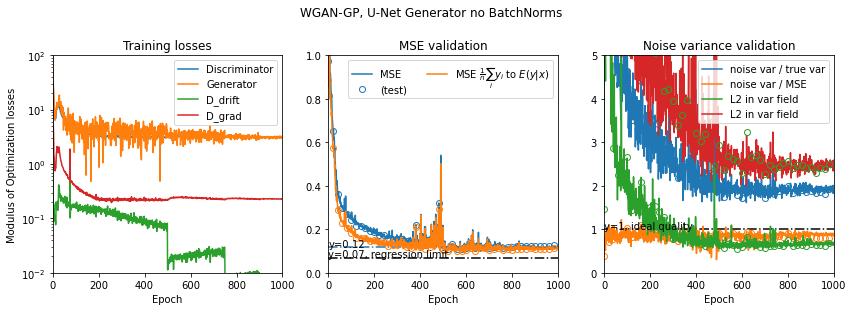

In [40]:
print_training('EXP8', 1000, ylims=[(1e-2,1e+2), (0,1.), (0,5)], residual=False, folder='CGAN_automatic')
plt.suptitle('WGAN-GP, U-Net Generator no BatchNorms', y=1.05)

# cPDF

In [27]:
import xarray as xr
import numpy as np

In [23]:
def custom_hist(yy, bins):
    hist, bin_edges = np.histogram(yy, bins=bins, density=True)
    centers = (bin_edges[0:-1] + bin_edges[1:])/2
    y1, y2 = np.percentile(yy, [0.1, 99.9])
    idx = (centers > y1) * (centers < y2)
    return centers[idx], hist[idx]
def estimate_distribution(_x, _y, Nbins=101):
    xmax = x.std() * 4
    print('xmax = ', xmax)
    bin_edges = np.linspace(-xmax, xmax, Nbins+1)
    centers = (bin_edges[0:Nbins] + bin_edges[1:Nbins+1])/2
    mean = 0 * centers
    std = 0 * centers
    pdf = []
    pdf_c = []
    for n in range(Nbins):
        idx = (_x >= bin_edges[n]) * (_x < bin_edges[n+1])
        yy = _y[idx]
        
        mean[n] = yy.mean()
        std[n] = yy.std()
        
        pdf.append(custom_hist(yy, bins=50))
        pdf_c.append(custom_hist(yy-yy.mean(), bins=50))
        
    return centers, mean, std, pdf, pdf_c

In [59]:
def plot_cpdf(x, y, nbins=101):
    centers, mean, std, pdf, pdf_c = estimate_distribution(x,y,nbins)
    plt.figure()
    plt.plot(centers, mean, ls='-', color='k')
    plt.plot(centers, mean-std,ls='--', color='k')
    plt.plot(centers, mean+std,ls='--', color='k')
    plt.axhline(y=0,ls='-.')
    plt.axvline(x=0,ls='-.')
    plt.xlabel('Deterministic prediction of dq/dt [$1/s^2$]')
    plt.ylabel('Subgrid forcing dq/dt [$1/s^2$]')
    
    def plot_normal(mean, std):
        x = np.linspace(mean-4*std, mean+4*std)
        y = 1/std/(2*np.pi)**0.5 * np.exp(-0.5 * (x-mean)**2 / std**2)
        plt.plot(x,y,ls='--')
    
    plt.figure()
    plt.semilogy(*pdf[0])
    plot_normal(mean[0], std[0])
    plt.semilogy(*pdf[15])
    plot_normal(mean[15], std[15])
    plt.semilogy(*pdf[30])
    plot_normal(mean[30], std[30])
    plt.semilogy(*pdf[50])
    plot_normal(mean[50], std[50])
    plt.semilogy(*pdf[-31])
    plot_normal(mean[-31], std[-31])
    plt.semilogy(*pdf[-16])
    plot_normal(mean[-16], std[-16])
    plt.semilogy(*pdf[-1])
    plot_normal(mean[-1], std[-1])
    plt.xlabel('Subgrid forcing dq/dt [$1/s^2$]')
    plt.ylabel('PDF')
    
    plt.figure(figsize=(14,3))
    plt.subplot(1,3,1)
    plt.semilogy(*pdf_c[0])
    plt.semilogy(*pdf_c[-1])
    plot_normal(0, std[0])
    plt.xlabel('Subgrid forcing dq/dt [$1/s^2$]')
    plt.ylabel('PDF')
    plt.subplot(1,3,2)
    plt.semilogy(*pdf_c[15])
    plt.semilogy(*pdf_c[-16])
    plot_normal(0, std[15])
    plt.xlabel('Subgrid forcing dq/dt [$1/s^2$]')
    plt.ylabel('PDF')
    plt.subplot(1,3,3)
    plt.semilogy(*pdf_c[30])
    plt.semilogy(*pdf_c[-31])
    plot_normal(0, std[30])
    plt.xlabel('Subgrid forcing dq/dt [$1/s^2$]')
    plt.ylabel('PDF')

# GZ2021. True PDF

In [60]:
predict = xr.open_dataset('/scratch/pp2681/pyqg_NN/mean_var/test.nc')

In [61]:
x = predict.q_forcing_advection_mean.values.ravel()
y = predict.q_forcing_advection.values.ravel()
z = x + predict.q_forcing_advection_std.values.ravel() * np.random.randn(*x.shape)

xmax =  9.555306199060531e-12


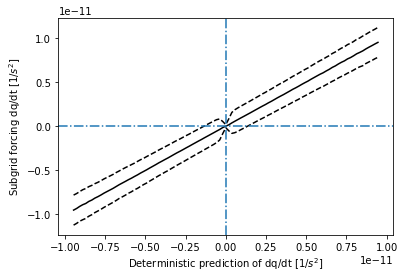

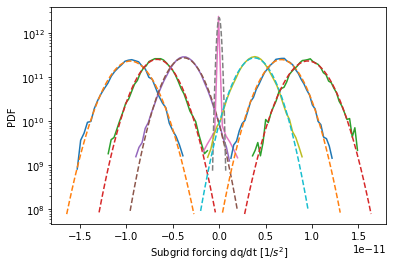

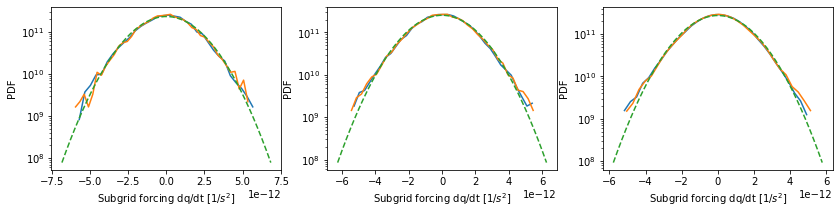

In [62]:
plot_cpdf(x,y)

# GZ2021. Generated

xmax =  9.555306199060531e-12


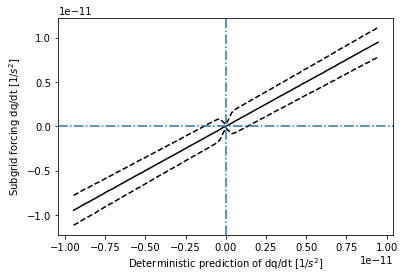

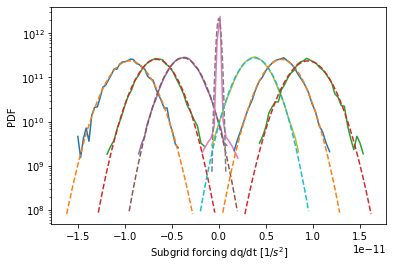

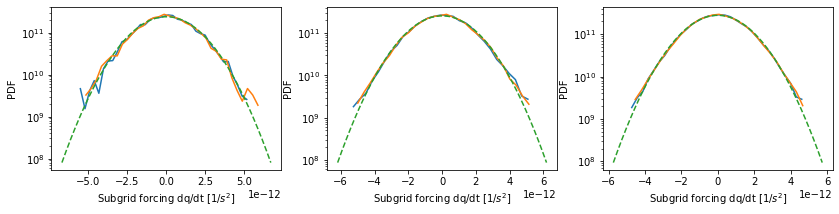

In [63]:
plot_cpdf(x,z)

# For one layer

In [66]:
x = predict.q_forcing_advection_mean.isel(lev=0, time=slice(40,None)).values.ravel()
y = predict.q_forcing_advection.isel(lev=0, time=slice(40,None)).values.ravel()
z = x + predict.q_forcing_advection_std.isel(lev=0, time=slice(40,None)).values.ravel() * np.random.randn(*x.shape)

xmax =  1.5556896049151447e-11
xmax =  1.5556896049151447e-11


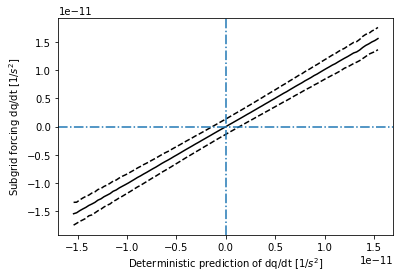

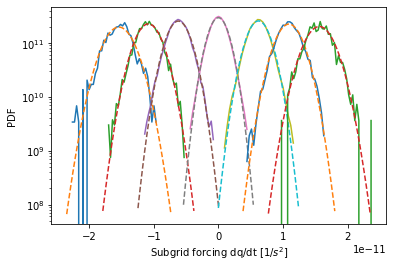

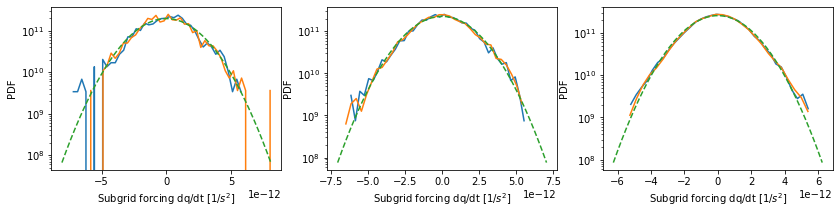

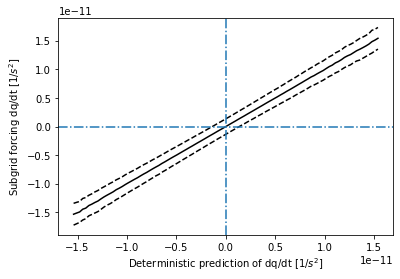

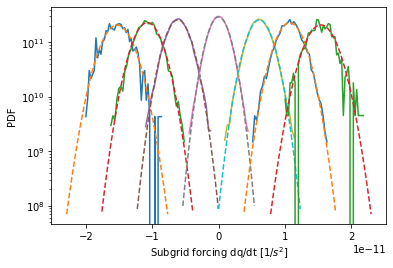

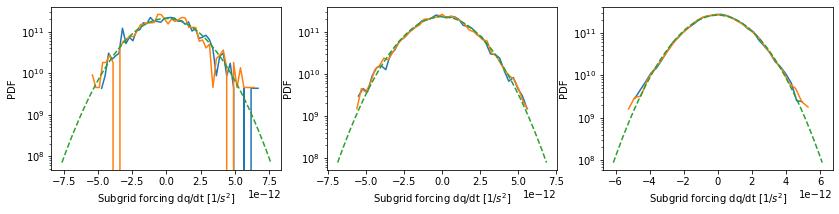

In [67]:
plot_cpdf(x,y)
plot_cpdf(x,z)

# CGAN. True PDF

In [70]:
predict = xr.open_dataset('/scratch/pp2681/pyqg_NN/CGAN_automatic/EXP4/test.nc')

In [71]:
x = predict.q_forcing_advection_gen_mean.isel(lev=0, time=slice(40,None)).values.ravel()
y = predict.q_forcing_advection.isel(lev=0, time=slice(40,None)).values.ravel()
z = predict.q_forcing_advection_gen.isel(lev=0, time=slice(40,None)).values.ravel()

xmax =  1.511760334971246e-11


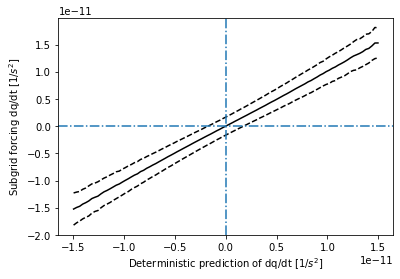

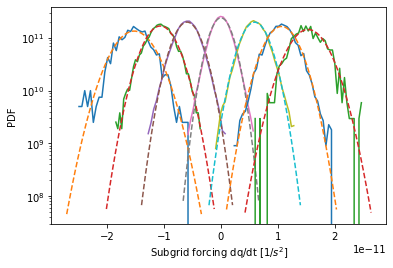

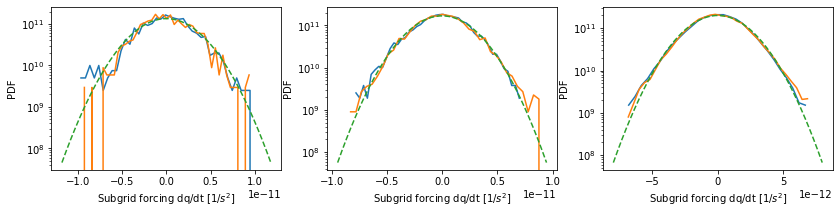

In [72]:
plot_cpdf(x,y)

# CGAN. Generated

xmax =  1.511760334971246e-11


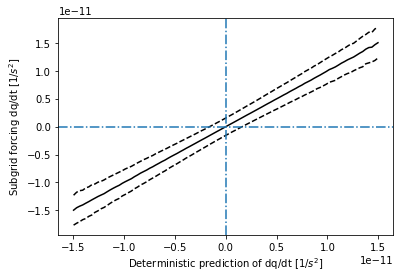

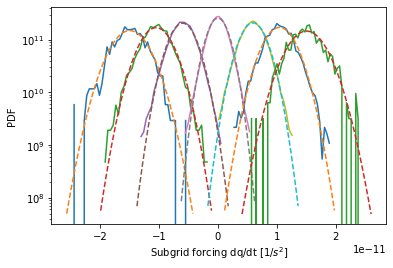

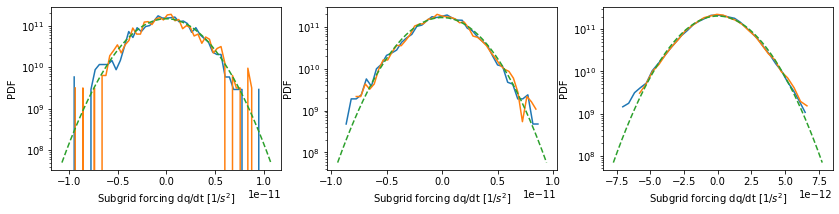

In [73]:
plot_cpdf(x,z)

In [74]:
_, _, _, pdf_true, _ = estimate_distirbution(x, y, Nbins=101)
_, _, _, pdf_gen, _ = estimate_distirbution(x, z, Nbins=101)

xmax =  1.511760334971246e-11
xmax =  1.511760334971246e-11


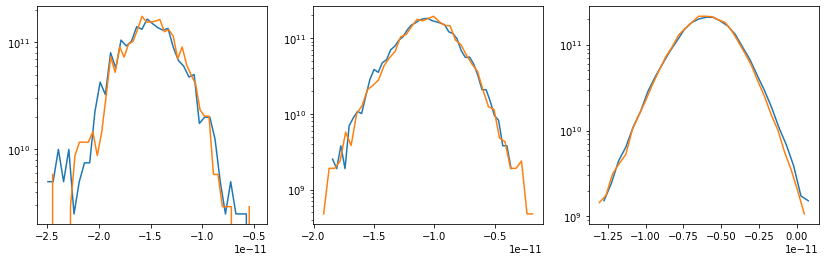

In [75]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.semilogy(*pdf_true[0])
plt.semilogy(*pdf_gen[0])
plt.subplot(1,3,2)
plt.semilogy(*pdf_true[15])
plt.semilogy(*pdf_gen[15])
plt.subplot(1,3,3)
plt.semilogy(*pdf_true[30])
plt.semilogy(*pdf_gen[30])

# Unified parameterization

In [25]:
import pyqg

In [128]:
model = MeanVarModel(['q'], ['q_forcing_advection'])
model.fit(test.isel(run=0, time=-1), test.isel(run=0, time=-2), num_epochs=5)
model.predict(test.isel(run=0))
online = model.test_online({'tavestart': 86400*5, 'tmax': 86400*10}, nruns=2)
offline = model.test_offline(test.isel(run=slice(0,2)))

(1, 2, 64, 64)
Training starts on device cpu, number of samples 1
[1/5] [0.50/1.99] Loss: [1.290, 1.219]
[2/5] [0.46/1.44] Loss: [1.068, 1.219]
[3/5] [0.40/0.91] Loss: [0.940, 1.218]
[4/5] [0.41/0.44] Loss: [0.918, 1.218]
[5/5] [0.41/0.00] Loss: [0.915, 1.218]
Training starts on device cpu, number of samples 1
[1/5] [0.40/1.60] Loss: [7.431, 12.527]
[2/5] [0.36/1.14] Loss: [7.112, 12.531]
[3/5] [0.41/0.78] Loss: [6.569, 12.536]
[4/5] [0.41/0.39] Loss: [6.475, 12.539]
[5/5] [0.35/0.00] Loss: [6.463, 12.543]


INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized


Relative error in spectral sum for power: 1.113136249841773e-06
Relative error in spectral sum for power: 0.00019071043733430833
Relative error in spectral sum for power: 1.2306278449614183e-06
Relative error in spectral sum for power: 0.000190752905770754


INFO:  Logger initialized
INFO:  Logger initialized


Relative error in spectral sum for power: 4.279469067114405e-06
Relative error in spectral sum for cospectrum: 1.3454288830175483e-07
Relative error in spectral sum for cospectrum: 7.407613796130481e-07


INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized


Relative error in spectral sum for cospectrum: 1.5842012377690254e-07
Relative error in spectral sum for cospectrum: 4.827317124776785e-08
Relative error in spectral sum for cospectrum: 4.474059703337428e-08


INFO:  Logger initialized


Relative error in spectral sum for cross_layer: 9.166968197860115e-07
Relative error in spectral sum for cross_layer: 0.006265188480800536


In [129]:
from models.parameterization import ReferenceModel
params = test.pyqg_params.copy()
params.update(dict(nx=64, ny=64))
%time reference = ReferenceModel().test_online(params, nruns=2)


INFO:  Logger initialized
INFO: Step: 1000, Time: 3.60e+06, KE: 4.56e-07, CFL: 0.006
INFO: Step: 2000, Time: 7.20e+06, KE: 5.16e-07, CFL: 0.006
INFO: Step: 3000, Time: 1.08e+07, KE: 6.88e-07, CFL: 0.006
INFO: Step: 4000, Time: 1.44e+07, KE: 9.53e-07, CFL: 0.006
INFO: Step: 5000, Time: 1.80e+07, KE: 1.36e-06, CFL: 0.006
INFO: Step: 6000, Time: 2.16e+07, KE: 2.01e-06, CFL: 0.006
INFO: Step: 7000, Time: 2.52e+07, KE: 3.06e-06, CFL: 0.006
INFO: Step: 8000, Time: 2.88e+07, KE: 4.75e-06, CFL: 0.006
INFO: Step: 9000, Time: 3.24e+07, KE: 7.55e-06, CFL: 0.006
INFO: Step: 10000, Time: 3.60e+07, KE: 1.22e-05, CFL: 0.007
INFO: Step: 11000, Time: 3.96e+07, KE: 2.00e-05, CFL: 0.009
INFO: Step: 12000, Time: 4.32e+07, KE: 3.31e-05, CFL: 0.011
INFO: Step: 13000, Time: 4.68e+07, KE: 5.55e-05, CFL: 0.014
INFO: Step: 14000, Time: 5.04e+07, KE: 9.34e-05, CFL: 0.018
INFO: Step: 15000, Time: 5.40e+07, KE: 1.56e-04, CFL: 0.024
INFO: Step: 16000, Time: 5.76e+07, KE: 2.22e-04, CFL: 0.027
INFO: Step: 17000, Time

INFO: Step: 51000, Time: 1.84e+08, KE: 4.64e-04, CFL: 0.043
INFO: Step: 52000, Time: 1.87e+08, KE: 4.58e-04, CFL: 0.039
INFO: Step: 53000, Time: 1.91e+08, KE: 4.64e-04, CFL: 0.043
INFO: Step: 54000, Time: 1.94e+08, KE: 4.78e-04, CFL: 0.044
INFO: Step: 55000, Time: 1.98e+08, KE: 4.85e-04, CFL: 0.044
INFO: Step: 56000, Time: 2.02e+08, KE: 4.81e-04, CFL: 0.046
INFO: Step: 57000, Time: 2.05e+08, KE: 4.88e-04, CFL: 0.046
INFO: Step: 58000, Time: 2.09e+08, KE: 4.77e-04, CFL: 0.050
INFO: Step: 59000, Time: 2.12e+08, KE: 4.69e-04, CFL: 0.044
INFO: Step: 60000, Time: 2.16e+08, KE: 4.79e-04, CFL: 0.045
INFO: Step: 61000, Time: 2.20e+08, KE: 4.63e-04, CFL: 0.040
INFO: Step: 62000, Time: 2.23e+08, KE: 4.66e-04, CFL: 0.048
INFO: Step: 63000, Time: 2.27e+08, KE: 4.72e-04, CFL: 0.042
INFO: Step: 64000, Time: 2.30e+08, KE: 4.83e-04, CFL: 0.049
INFO: Step: 65000, Time: 2.34e+08, KE: 4.97e-04, CFL: 0.050
INFO: Step: 66000, Time: 2.38e+08, KE: 4.75e-04, CFL: 0.045
INFO: Step: 67000, Time: 2.41e+08, KE: 4

CPU times: user 3min 32s, sys: 8min 59s, total: 12min 32s
Wall time: 1min 48s


(1e-05, 0.0002)

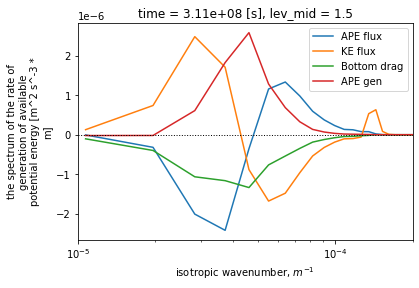

In [130]:
ds = reference

ds.APEfluxr.plot(xscale='log', label='APE flux')
ds.KEfluxr.plot(xscale='log', label='KE flux')
ds.KEfrictionspecr.plot(xscale='log', label='Bottom drag')
ds.APEgenspecr.plot(xscale='log', label='APE gen')
plt.legend()
plt.axhline(y=0, ls=':', color='k', linewidth=1)
plt.xlim([1e-5, 2e-4])

# Subgrid kinetic energy

In [18]:
import numpy as np
import gcm_filters
test = pse.Dataset(transfer_set).isel(time=slice(-1,None)).isel(lev=0)

In [19]:
tuu = -test.uu_subgrid_flux
tvv = -test.vv_subgrid_flux
tuv = -test.uv_subgrid_flux

In [20]:
sxx = test.ddx('u')
syy = test.ddy('v')
sxy = 0.5 * (test.ddy('u') + test.ddx('v'))
S = np.sqrt(2*(sxx**2 + syy**2 + 2*sxy**2))
w = test.vorticity
Delta = np.sqrt(5) * (test.x[1]-test.x[0])
K_est = Delta**2/48*(S**2+w**2)
K_estf = gcm_filters.Filter(dx_min=1,
            filter_scale=2,
            filter_shape=gcm_filters.FilterShape.GAUSSIAN,
            grid_type=gcm_filters.GridType.REGULAR).apply(K_est, dims=('y', 'x'))
K = np.maximum(0.5 * (tuu + tvv), 0)
K_full = 0.5 * (tuu + tvv)

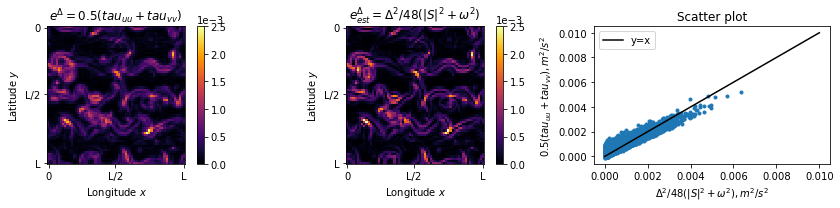

In [21]:
idx = {'run':0, 'time':-1}
with pse.figure_grid(1,3) as g:
    g.next('$e^{\Delta}=0.5(tau_{uu}+tau_{vv})$')
    pse.imshow(K.isel(idx), vmin=0, vmax=2.5e-3)
    g.next('$e^{\Delta}_{est}=\Delta^2/48(|S|^2+\omega^2)$')
    pse.imshow(K_est.isel(idx), vmin=0, vmax=2.5e-3)
    g.next('Scatter plot')
    plt.plot(K_est.values.ravel(), K_full.values.ravel(),'.')
    plt.plot([0, 0.01], [0, 0.01], ls='-', color='k', label='y=x')
    plt.xlabel('$\Delta^2/48(|S|^2+\omega^2), m^2/s^2$')
    plt.ylabel('$0.5(tau_{uu}+tau_{vv}), m^2/s^2$')
    plt.legend()
    plt.tight_layout()
    plt.savefig('SGS_KE.png', dpi=300)

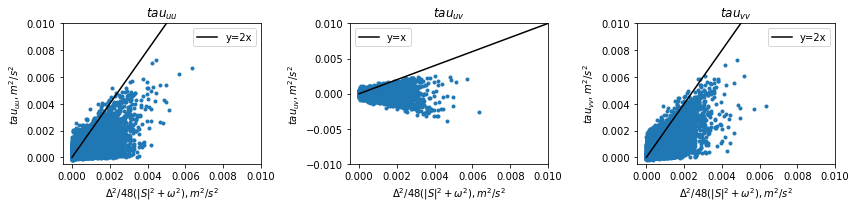

In [22]:
with pse.figure_grid(1,3) as g:
    g.next('$tau_{uu}$')
    plt.plot(K_est.values.ravel(), tuu.values.ravel(),'.', linewidth=0.1)
    plt.xlabel('$\Delta^2/48(|S|^2+\omega^2), m^2/s^2$')
    plt.ylabel('$tau_{uu}, m^2/s^2$')
    plt.plot([0, 0.005], [0, 0.01], ls='-', color='k', label='y=2x')
    plt.legend()    
    plt.xlim([-0.0005, 0.01])
    plt.ylim([-0.0005, 0.01])
    
    g.next('$tau_{uv}$')
    plt.plot(K_est.values.ravel(), tuv.values.ravel(),'.')
    plt.xlabel('$\Delta^2/48(|S|^2+\omega^2), m^2/s^2$')
    plt.ylabel('$tau_{uv}, m^2/s^2$')
    plt.plot([0, 0.01], [0, 0.01], ls='-', color='k', label='y=x')
    plt.legend()
    plt.xlim([-0.0005, 0.01])
    plt.ylim([-0.01, 0.01])
    
    g.next('$tau_{vv}$')
    plt.plot(K_est.values.ravel(), tvv.values.ravel(),'.')
    plt.xlabel('$\Delta^2/48(|S|^2+\omega^2), m^2/s^2$')
    plt.ylabel('$tau_{vv}, m^2/s^2$')
    plt.plot([0, 0.005], [0, 0.01], ls='-', color='k', label='y=2x')
    plt.legend()
    plt.xlim([-0.0005, 0.01])
    plt.ylim([-0.0005, 0.01])
    
    plt.tight_layout()
    plt.savefig('tau.png', dpi=300)

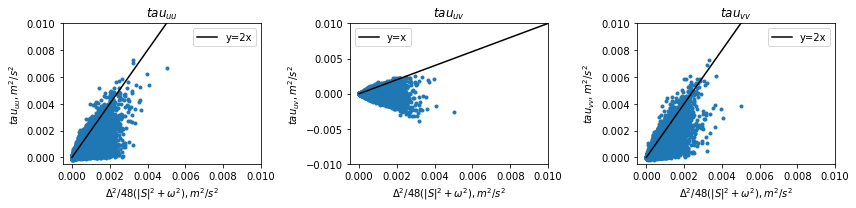

In [23]:
with pse.figure_grid(1,3) as g:
    g.next('$tau_{uu}$')
    plt.plot(K_estf.values.ravel(), tuu.values.ravel(),'.', linewidth=0.1)
    plt.xlabel('$\Delta^2/48(|S|^2+\omega^2), m^2/s^2$')
    plt.ylabel('$tau_{uu}, m^2/s^2$')
    plt.plot([0, 0.005], [0, 0.01], ls='-', color='k', label='y=2x')
    plt.legend()    
    plt.xlim([-0.0005, 0.01])
    plt.ylim([-0.0005, 0.01])
    
    g.next('$tau_{uv}$')
    plt.plot(K_estf.values.ravel(), tuv.values.ravel(),'.')
    plt.xlabel('$\Delta^2/48(|S|^2+\omega^2), m^2/s^2$')
    plt.ylabel('$tau_{uv}, m^2/s^2$')
    plt.plot([0, 0.01], [0, 0.01], ls='-', color='k', label='y=x')
    plt.legend()
    plt.xlim([-0.0005, 0.01])
    plt.ylim([-0.01, 0.01])
    
    g.next('$tau_{vv}$')
    plt.plot(K_estf.values.ravel(), tvv.values.ravel(),'.')
    plt.xlabel('$\Delta^2/48(|S|^2+\omega^2), m^2/s^2$')
    plt.ylabel('$tau_{vv}, m^2/s^2$')
    plt.plot([0, 0.005], [0, 0.01], ls='-', color='k', label='y=2x')
    plt.legend()
    plt.xlim([-0.0005, 0.01])
    plt.ylim([-0.0005, 0.01])
    
    plt.tight_layout()
    plt.savefig('tau_f.png', dpi=300)

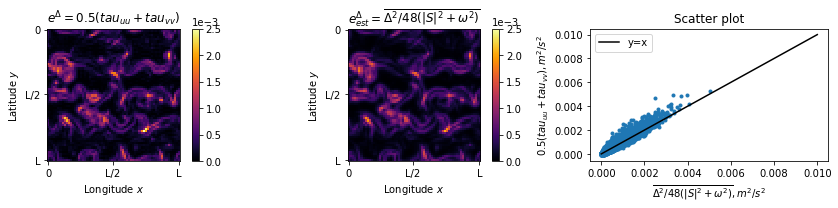

In [24]:
idx = {'run':0, 'time':-1}
with pse.figure_grid(1,3) as g:
    g.next('$e^{\Delta}=0.5(tau_{uu}+tau_{vv})$')
    pse.imshow(K.isel(idx), vmin=0, vmax=2.5e-3)
    g.next('$e^{\Delta}_{est}=\overline{\Delta^2/48(|S|^2+\omega^2)}$')
    pse.imshow(K_estf.isel(idx), vmin=0, vmax=2.5e-3)
    g.next('Scatter plot')
    plt.plot(K_estf.values.ravel(), K_full.values.ravel(),'.')
    plt.plot([0, 0.01], [0, 0.01], ls='-', color='k', label='y=x')
    plt.xlabel('$\overline{\Delta^2/48(|S|^2+\omega^2)}, m^2/s^2$')
    plt.ylabel('$0.5(tau_{uu}+tau_{vv}), m^2/s^2$')
    plt.legend()
    plt.tight_layout()
    plt.savefig('SGS_KEf.png', dpi=300)

# Diagnostic similarities

In [78]:
online1 = model.test_online({'tavestart': 86400*5, 'tmax': 86400*10}, nruns=2)
online2 = model.test_online({'tavestart': 86400*5, 'tmax': 86400*10}, nruns=2)
online3 = model.test_online({'tavestart': 86400*5, 'tmax': 86400*10}, nruns=2)

INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized


In [83]:
import pyqg_parameterization_benchmarks as ppb

In [84]:
ppb.diagnostic_similarities(online1, online2, online3)

{'distrib_diff_q1': -0.18062803295205776,
 'distrib_diff_q2': 0.3846221797661401,
 'distrib_diff_u1': -0.1291472543383858,
 'distrib_diff_u2': 0.8865908729807551,
 'distrib_diff_v1': -0.22926586393038884,
 'distrib_diff_v2': -0.6787240690811693,
 'distrib_diff_KE1': -0.2034248872409985,
 'distrib_diff_KE2': -0.8138161245364446,
 'distrib_diff_Ens1': 0.71624441751475,
 'distrib_diff_Ens2': 0.41708593278320993,
 'spectral_diff_KEspec1': -0.19970357486044898,
 'spectral_diff_KEspec2': -1.619437074597856,
 'spectral_diff_Ensspec1': -0.36547155022585764,
 'spectral_diff_Ensspec2': -0.19129016659685671,
 'spectral_diff_KEflux': 0.4628380501231535,
 'spectral_diff_APEflux': 0.39370307704633356,
 'spectral_diff_APEgenspec': -0.5512481382095977,
 'spectral_diff_KEfrictionspec': -1.619437074597856}

# Ensemble simulations

# Different amplitude

run of ensemble = 0
run of ensemble = 0
run of ensemble = 0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


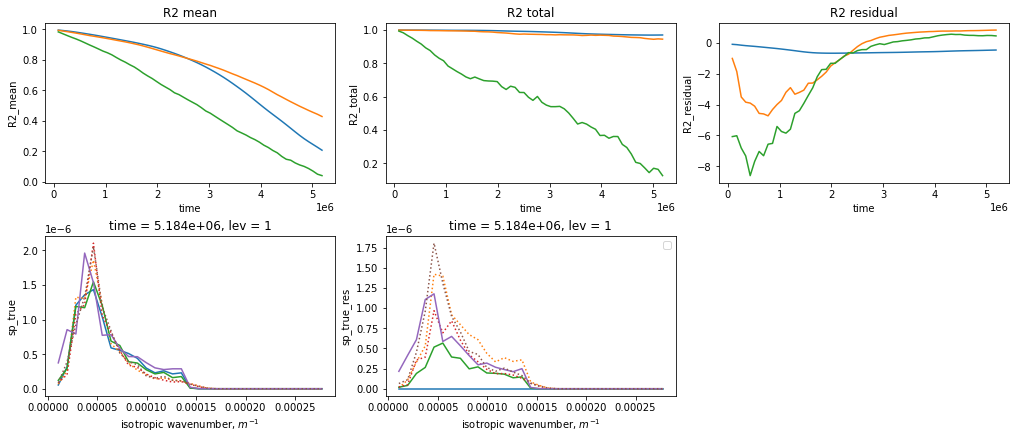

In [207]:
data = xr.open_dataset('/scratch/pp2681/pyqg_generative/highres/online_eddy.nc')
plt.figure(figsize=(14,6), constrained_layout=True)
for amp in [0, 4, 12]:
    m = TrivialStochastic(amp=amp)
    out = m.test_ensemble(ds, EDDY_PARAMS, nruns=1, Tmax=60*86400, ensemble_size=5, output_sampling=86400)
    plt.subplot(2,3,1)
    out.R2_mean.plot(label='amp='+str(amp))
    plt.title('R2 mean')
    plt.subplot(2,3,2)
    out.R2_total.plot(label='amp='+str(amp))
    plt.title('R2 total')
    plt.subplot(2,3,3)
    out.R2_residual.plot(label='amp='+str(amp))
    plt.title('R2 residual')
    plt.subplot(2,3,4)
    out.sp_gen.isel(time=-1, lev=0).plot()
    out.sp_true.isel(time=-1, lev=0).plot(ls=':')
    plt.subplot(2,3,5)
    out.sp_gen_res.isel(time=-1, lev=0).plot()
    out.sp_true_res.isel(time=-1, lev=0).plot(ls=':')
plt.legend()

# Different correlation time

run of ensemble = 0
run of ensemble = 0
run of ensemble = 0


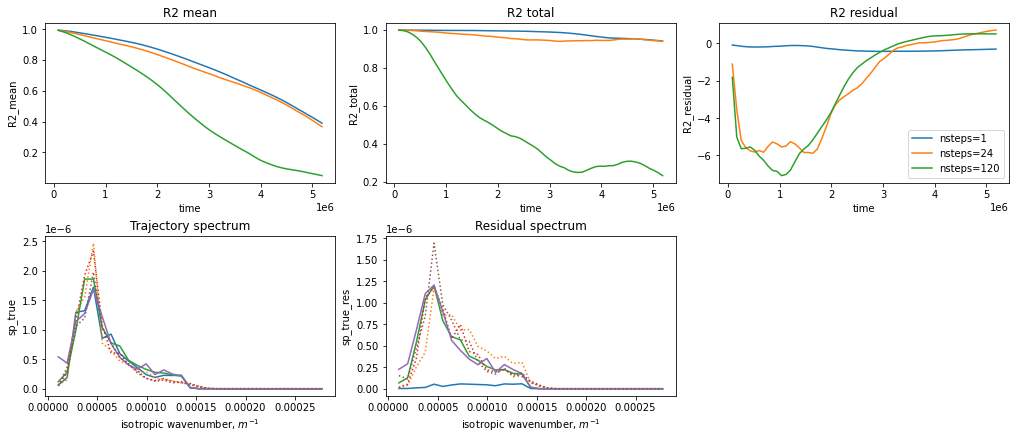

In [209]:
data = xr.open_dataset('/scratch/pp2681/pyqg_generative/highres/online_eddy.nc')
plt.figure(figsize=(14,6), constrained_layout=True)
for nsteps in [1, 24, 24*5]:
    m = TrivialStochastic(amp=1)
    out = m.test_ensemble(ds, EDDY_PARAMS, nsteps=nsteps, 
        nruns=1, Tmax=60*86400, ensemble_size=5, output_sampling=86400)
    plt.subplot(2,3,1)
    out.R2_mean.plot(label='nsteps='+str(nsteps))
    plt.title('R2 mean')
    plt.subplot(2,3,2)
    out.R2_total.plot(label='nsteps='+str(nsteps))
    plt.title('R2 total')
    plt.subplot(2,3,3)
    out.R2_residual.plot(label='nsteps='+str(nsteps))
    plt.title('R2 residual')
    plt.legend()
    plt.subplot(2,3,4)
    out.sp_gen.isel(time=-1, lev=0).plot()
    out.sp_true.isel(time=-1, lev=0).plot(ls=':')
    plt.title('Trajectory spectrum')
    plt.subplot(2,3,5)
    out.sp_gen_res.isel(time=-1, lev=0).plot()
    out.sp_true_res.isel(time=-1, lev=0).plot(ls=':')
    plt.title('Residual spectrum')

# Zanna-Manna sampling

run of ensemble = 0
run of ensemble = 0
run of ensemble = 0


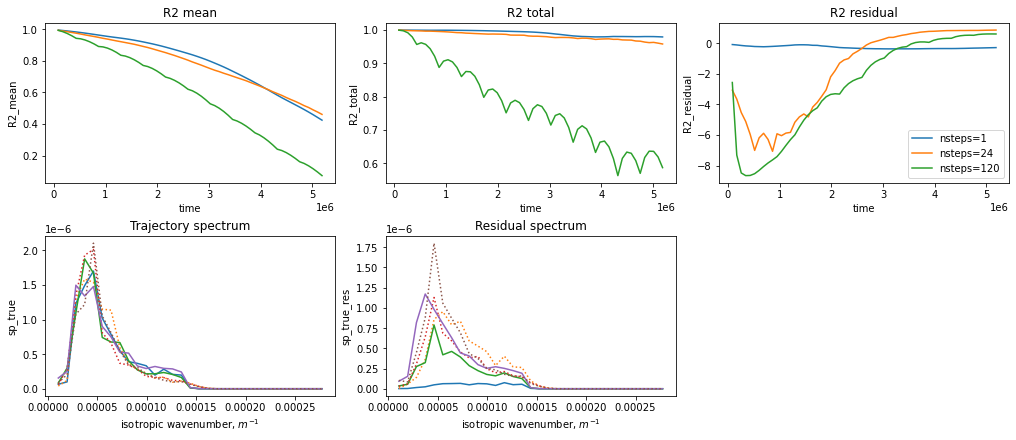

In [210]:
data = xr.open_dataset('/scratch/pp2681/pyqg_generative/highres/online_eddy.nc')
plt.figure(figsize=(14,6), constrained_layout=True)
for nsteps in [1, 24, 24*5]:
    m = TrivialStochastic(amp=1)
    out = m.test_ensemble(ds, EDDY_PARAMS, sampling_type='constant', nsteps=nsteps, 
        nruns=1, Tmax=60*86400, ensemble_size=5, output_sampling=86400)
    plt.subplot(2,3,1)
    out.R2_mean.plot(label='nsteps='+str(nsteps))
    plt.title('R2 mean')
    plt.subplot(2,3,2)
    out.R2_total.plot(label='nsteps='+str(nsteps))
    plt.title('R2 total')
    plt.subplot(2,3,3)
    out.R2_residual.plot(label='nsteps='+str(nsteps))
    plt.title('R2 residual')
    plt.legend()
    plt.subplot(2,3,4)
    out.sp_gen.isel(time=-1, lev=0).plot()
    out.sp_true.isel(time=-1, lev=0).plot(ls=':')
    plt.title('Trajectory spectrum')
    plt.subplot(2,3,5)
    out.sp_gen_res.isel(time=-1, lev=0).plot()
    out.sp_true_res.isel(time=-1, lev=0).plot(ls=':')
    plt.title('Residual spectrum')

# Multiprocessing

In [1]:
import torch
from pyqg_generative.models.parameterization import *
from pyqg_generative.models.mean_var_model import MeanVarModel
%load_ext autoreload
%autoreload 3

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
param_old = torch.load('/scratch/pp2681/pyqg_generative/MeanVarModel/net_state')
param = MeanVarModel(['q'], ['q_forcing_advection'])
param.net_mean.load_state_dict(param_old.net_mean.state_dict())
param.net_var.load_state_dict(param_old.net_var.state_dict())
param.x_scale = param_old.x_scale
param.y_scale = param_old.y_scale

In [15]:
%%time
out = param.test_online(EDDY_PARAMS, nruns=1)

INFO:  Logger initialized
INFO:  Logger initialized


Testing online with pyqg_params: {'nx': 64, 'dt': 14400, 'tmax': 311040000, 'tavestart': 155520000}
run =  0


INFO: Step: 1000, Time: 1.44e+07, KE: 1.41e-06, CFL: 0.026
INFO: Step: 2000, Time: 2.88e+07, KE: 8.50e-06, CFL: 0.036
INFO: Step: 3000, Time: 4.32e+07, KE: 3.88e-05, CFL: 0.055
INFO: Step: 4000, Time: 5.76e+07, KE: 1.34e-04, CFL: 0.093
INFO: Step: 5000, Time: 7.20e+07, KE: 2.55e-04, CFL: 0.139
INFO: Step: 6000, Time: 8.64e+07, KE: 3.26e-04, CFL: 0.147
INFO: Step: 7000, Time: 1.01e+08, KE: 3.98e-04, CFL: 0.146
INFO: Step: 8000, Time: 1.15e+08, KE: 4.46e-04, CFL: 0.163
INFO: Step: 9000, Time: 1.30e+08, KE: 4.40e-04, CFL: 0.169
INFO: Step: 10000, Time: 1.44e+08, KE: 4.09e-04, CFL: 0.188
INFO: Step: 11000, Time: 1.58e+08, KE: 4.20e-04, CFL: 0.167
INFO: Step: 12000, Time: 1.73e+08, KE: 4.03e-04, CFL: 0.151
INFO: Step: 13000, Time: 1.87e+08, KE: 4.16e-04, CFL: 0.162
INFO: Step: 14000, Time: 2.02e+08, KE: 4.25e-04, CFL: 0.165
INFO: Step: 15000, Time: 2.16e+08, KE: 4.53e-04, CFL: 0.173
INFO: Step: 16000, Time: 2.30e+08, KE: 4.55e-04, CFL: 0.176
INFO: Step: 17000, Time: 2.45e+08, KE: 4.82e-04, 

Function 'test_online' executed in 210.3201s
CPU times: user 6min 33s, sys: 16min 51s, total: 23min 24s
Wall time: 3min 30s


In [14]:
%%time
out = param.test_online(EDDY_PARAMS, nruns=5, sampling_type='constant', nsteps=6)

INFO:  Logger initialized


Testing online with pyqg_params: {'nx': 64, 'dt': 14400, 'tmax': 311040000, 'tavestart': 155520000}


INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 1000, Time: 1.44e+07, KE: 2.37e-06, CFL: 0.027
INFO: Step: 1000, Time: 1.44e+07, KE: 1.02e-06, CFL: 0.026
INFO: Step: 1000, Time: 1.44e+07, KE: 1.71e-06, CFL: 0.027
INFO: Step: 1000, Time: 1.44e+07, KE: 1.84e-06, CFL: 0.026
INFO: Step: 1000, Time: 1.44e+07, KE: 2.29e-06, CFL: 0.028
INFO: Step: 2000, Time: 2.88e+07, KE: 1.64e-05, CFL: 0.040
INFO: Step: 2000, Time: 2.88e+07, KE: 7.18e-06, CFL: 0.037
INFO: Step: 2000, Time: 2.88e+07, KE: 1.21e-05, CFL: 0.039
INFO: Step: 2000, Time: 2.88e+07, KE: 1.31e-05, CFL: 0.044
INFO: Step: 2000, Time: 2.88e+07, KE: 1.23e-05, CFL: 0.043
INFO: Step: 3000, Time: 4.32e+07, KE: 8.90e-05, CFL: 0.079
INFO: Step: 3000, Time: 4.32e+07, KE: 2.87e-05, CFL: 0.054
INFO: Step: 3000, Time: 4.32e+07, KE: 5.72e-05, CFL: 0.064
INFO: Step: 3000, Time: 4.32e+07, KE: 6.81e-05, CFL: 0.078
INFO: Step: 3000, Time: 4.32e+07, KE: 4.60e-

Function 'test_online' executed in 195.1683s
CPU times: user 469 ms, sys: 456 ms, total: 924 ms
Wall time: 3min 15s


(0.01, 100.0)

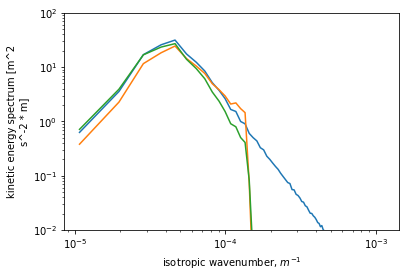

In [15]:
import matplotlib.pyplot as plt
highres = xr.open_dataset('/scratch/pp2681/pyqg_generative/highres/online_eddy.nc')
lowres = xr.open_dataset('/scratch/pp2681/pyqg_generative/lowres/online_test.nc')
highres.KEspecr.plot()
lowres.KEspecr.plot()
out.KEspecr.plot(xscale='log', yscale='log')
plt.ylim([1e-2, 1e+2])